<br/><br/><br/><br/><br/><br/><br/><br/><br/>
# Исследование поведения пользователей Яндекс Афиши

## Описание проекта

Задача: помочь маркетологам оптимизировать маркетинговые затраты.

У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
* лог сервера с данными о посещениях сайта Яндекс.Афиши,
* выгрузка всех заказов за этот период,
* статистика рекламных расходов.

Необходимо изучить:
* как люди пользуются продуктом,
* когда они начинают покупать,
* сколько денег приносит каждый клиент
* когда клиент окупается.

<br/><br/><br/>
# Импорт данных и подготовка к анализу

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

Последовательно просмотрю таблицы
---

**Визиты**

In [3]:
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


**Выводы:**
1. Пропуски отсутствуют
2. Заголовки столбцов стоит заменить на написание в нижнем регистре с нижнем подчеркиванием
3. Две колонки с датами перевести в тип данных datetime


**Заказы**

In [5]:
orders.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


**Выводы:**
1. Пропусков нет
2. Скорректировать написание заголовков столбцов
3. Перевести дату в формат datetime

**Маркетинговые затраты**

In [7]:
costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


**Выводы**
1. Пропусков нет
2. Переменную с датой перевести в тип datetime
3. Заголовок dt переименовать во что то более наглядное

**Заметка**
1. В этой таблице кратность даты равна дню, в остальных минутам

### Выводы

Качество данных хорошее, пропусков нет

<br/><br/><br/>
# Подготовка данных к анализу

**Корректирую названия столбцов**

Привожу в нижний регистр, заменяю пробел на "_", уточняю названия

In [9]:
visits.columns = ['device', 'session_end_ts', 'source_id', 'session_start_ts', 'uid']
orders.columns = ['order_date', 'revenue', 'uid']
costs.columns = ['source_id', 'costs_date', 'costs']

**Изменяю тип данных в столбцах с датой**

In [10]:
visits['session_start_ts'] = pd.to_datetime(visits['session_start_ts'])
visits['session_end_ts'] = pd.to_datetime(visits['session_end_ts'])
orders['order_date'] = pd.to_datetime(orders['order_date'])
costs['costs_date'] = pd.to_datetime(costs['costs_date'])

**Добавляю столбцы: день, неделя и месяц действия**

In [11]:
visits['session_day'] = visits['session_start_ts'].dt.day
visits['session_week'] = visits['session_start_ts'].dt.week
visits['session_month'] = visits['session_start_ts'].dt.month
visits['session_year'] = visits['session_start_ts'].dt.year
visits['session_date'] = visits['session_start_ts'].astype('datetime64[D]')

In [12]:
#visits['session_date'] = visits['session_start_ts'].dt.date # Этот метод дает тип данных object, неудобно

Замена успешно завершена.

**Удаляю последний заказ за июнь 2018 года**

Пояснение:
1. В таблице orders представлены данные с июня 2017 по июнь 2018 года.
2. Но, в июне 2018 года был сделан всего 1 заказ
3. При этом, в таблицах visits и costs на эту же дату нет ни визитов, ни расходов на рекламу, они заканчиваются 31 маем

Таким образом, этот один заказ создает одну отдельную когорту, которая будет вносить неточность в расчеты самим фактом своего существования. Решение: удалить этот заказ.

In [13]:
# Один заказа для июня 2018
orders[orders['order_date'] > '2018-06-01']

,order_date,revenue,uid
50414,2018-06-01 00:02:00,3.42,83872787173869366


In [14]:
# Удаляю этот заказ
orders = orders[orders['order_date'] < '2018-06-01']

Замена успешно завершена.

*Заметка. Конечно, обнаружил я этот заказ не на этом этапе исследования, но решил удалить здесь, чтобы не захламлять код ниже.*

<br/><br/><br/><br/><br/><br/>
Анализ данных
---

Продуктовые метрики —————————————————————————————————————
===

1. Сколько людей пользуются в день, неделю, месяц?
2. Сколько сессий в день?
3. Сколько длится одна сессия?
4. Как часто люди возвращаются?

<br/><br/><br/>
Среднее кол-во пользователей в день, неделю месяц (DAU, WAU, MAU)
---

In [15]:
DAU = visits.groupby('session_date').agg({'uid':'nunique'}).mean()
WAU = visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'}).mean()
MAU = visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean()

In [16]:
print('Вывод')
print('В среднем в день:', int(DAU))
print('В среднем в неделю:', int(WAU))
print('В среднем в месяц:', int(MAU))

Вывод
В среднем в день: 907
В среднем в неделю: 5716
В среднем в месяц: 23228


<br/><br/><br/><br/><br/><br/>
SpD. Среднее количество сессий в день (SpD)
---

SpD — Session Per Day

**Рассчитаю значение**

In [17]:
SpD = visits.groupby('session_date').agg({'uid':'count'})
SpD.head()

,uid
session_date,
2017-06-01,664
2017-06-02,658
2017-06-03,477
2017-06-04,510
2017-06-05,893


**Визуализирую распределение**

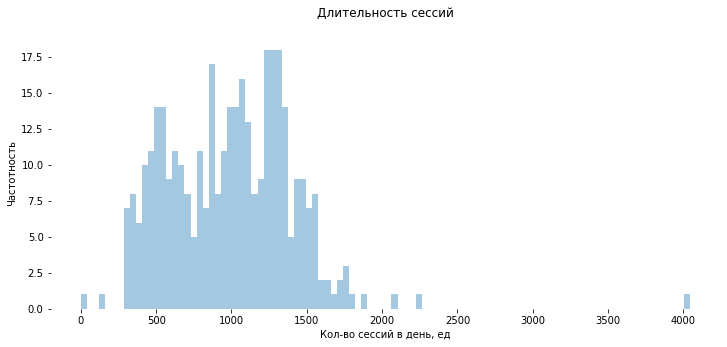

In [18]:
plt.figure(figsize=(12,5))
plt.title('Длительность сессий', pad=20)
#plt.xlim(0, 100)

ax = sns.distplot(SpD['uid'], bins=100, kde=False, axlabel='Кол-во сессий в день, ед')
ax.tick_params(labelleft=True, left=True)
#ax.set_xlabel('Длительность сессии, сек')
ax.set_ylabel('Частотность')
sns.despine(left=True, bottom=True)
print('')

Картину портит выброс в районе 4000 сессий

**Удаляю выбросы**

In [19]:
SpD.describe()

,uid
count,364.000000
mean,987.362637
std,418.994796
min,1.000000
25%,635.500000
50%,1003.000000
75%,1280.000000
max,4042.000000


In [20]:
print('Верхняя границы:', ((1280 - 635.5) * 1.5) + 1280)

Верхняя границы: 2246.75


Сколько значений больше верхней границы?

In [21]:
SpD[SpD['uid'] > 2246.75]

,uid
session_date,
2017-11-24,4042
2018-05-31,2256


Их всего 2, причем значение 2256 очень близко к врехней границе в 2246 ед. Поскольку эта граница... скорее рекомендовання, чем жестко закрепленна каким то математическим законом, я исключу из расчетов только день с знаечнием 4042.

Возможная причина выброса?
1. Рекламная акция
2. Премьера нового популярного фильма

Посмотрев даты примьер, прихожу к выводу, что это был широко разрекламированный фильм «Легенда о Коловрате», дата премьеры которого 30 ноября, а продажа билетов началась заранее.

**Удалю выброс**

In [22]:
SpD = SpD[SpD['uid'] <= 2256]

**Визуализирую распределение**

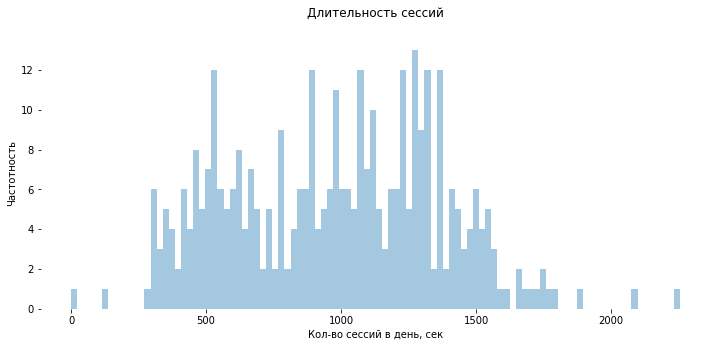

In [23]:
plt.figure(figsize=(12,5))
plt.title('Длительность сессий', pad=20)
#plt.xlim(0, 100)

ax = sns.distplot(SpD['uid'], bins=100, kde=False, axlabel='Кол-во сессий в день, сек')
ax.tick_params(labelleft=True, left=True)
#ax.set_xlabel('Длительность сессии, сек')
ax.set_ylabel('Частотность')
sns.despine(left=True, bottom=True)
print('')

**Несмотря на шумность распределения,** хорошо видны его границы и среднее. Рассчитаю его и медиану:

In [24]:
print('Сессий в день, среднее:', int(SpD.mean()))
print('Сессий в день, медиана:', int(SpD.median()))

Сессий в день, среднее: 978
Сессий в день, медиана: 996


**Вывод.** Среднее кол-во сессий в день составило 975.

<br/><br/><br/><br/><br/><br/>
ASL. Средняя длительность одной сессии
---

ASL — Average Session Duration

**Вычисляю длительность сессии в сек**

In [25]:
visits['duration_sessions_sec'] = (visits['session_end_ts'] - visits['session_start_ts']).dt.seconds

**Визуализирую распределение**

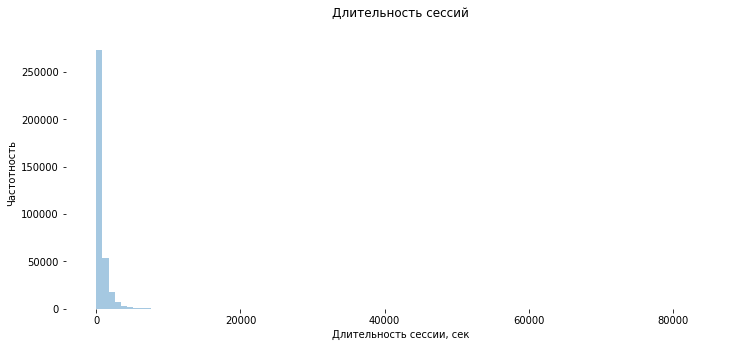

In [26]:
plt.figure(figsize=(12,5))
plt.title('Длительность сессий', pad=20)
#plt.xlim(0, 100)

ax = sns.distplot(visits['duration_sessions_sec'], bins=100, kde=False, axlabel='Длительность сессии, сек')
ax.tick_params(labelleft=True, left=True)
#ax.set_xlabel('Длительность сессии, сек')
ax.set_ylabel('Частотность')
sns.despine(left=True, bottom=True)
print('')

**Это рапределение Пуассона** с очень длинным "хвостом", что говорит о большом кол-ве выбросов.

**Удалю выбросы**

Определяю границы распределния

In [27]:
visits['duration_sessions_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duration_sessions_sec, dtype: float64

In [28]:
print('Верхняя граница нормального распределения:', ((840-120) * 1.5) + 840)

Верхняя граница нормального распределения: 1920.0


In [29]:
print('Значений выше верхней границы:', visits[visits['duration_sessions_sec'] > 1920]['uid'].count())

Значений выше верхней границы: 24658


Удаляю выбросы, а также сессии с продолжительностью 0 сек

In [30]:
visits_new = visits[(visits['duration_sessions_sec'] < 1920) & (visits['duration_sessions_sec'] > 0)]

**Визуализация распределения**

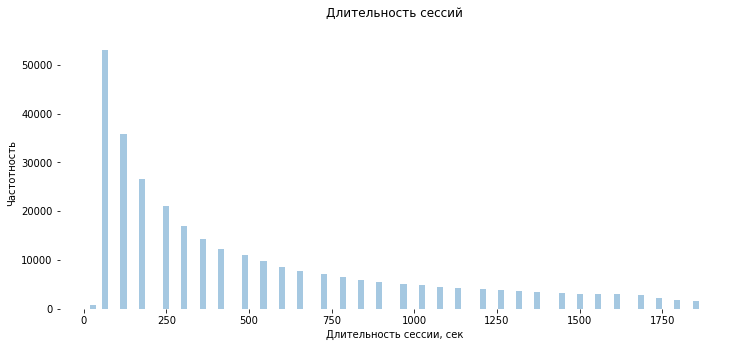

In [31]:
plt.figure(figsize=(12,5))
plt.title('Длительность сессий', pad=20)
#plt.xlim(0, 250)

ax = sns.distplot(visits_new['duration_sessions_sec'], bins=100, kde=False, axlabel='Длительность сессии, сек')
ax.tick_params(labelleft=True, left=True)
#ax.set_xlabel('Длительность сессии, сек')
ax.set_ylabel('Частотность')
sns.despine(left=True, bottom=True)
print('')

**Так нагляднее**

**Теперь прекрасно видно распределение Пуассона.** А для этого распределения ценнее найти моду, чем среднее или медиану

In [32]:
ASL = int(visits['duration_sessions_sec'].mode())

In [33]:
print('Средняя продолжительность сессии: {} секунд'.format(ASL))

Средняя продолжительность сессии: 60 секунд


**Вывод**

Средняя продолжительность сессии — 60 сек. Что логично, т.к. 1 мин достаточно, чтобы зайти на сайт и найти интересующее мероприятие (узнать цену, дату и т.п.). Предполагаю, большая часть посетителей заходит на Яндекс Афишу именно с этой целью.

<br/><br/><br/><br/><br/><br/>
Количество сессий на одного пользователя
---

**Создам таблицу без аномальной даты (24 ноября) для точности расчетов**

In [34]:
visits_new = visits[visits['session_date'] != '2017-11-24']

**Строю сводную таблицу: год, месяц, кол-во сессий, кол-в юзеров**

In [35]:
buffer = visits_new.groupby(['session_year', 'session_month']).agg({'uid':['count', 'nunique']}).rename(columns={'count':'session', 'nunique':'users'})
buffer.head()

uid       
                           session  users
session_year session_month               
2017         6               16505  13259
             7               17828  14183
             8               14355  11631
             9               23907  18975
             10              37903  29692

In [36]:
# Переименую столбцы
buffer.columns = ['n_sessions', 'n_users']

**Рассчитываю среднее кол-во сеcсий на пользователя в месяц**

In [37]:
buffer['session_per_user'] = buffer['n_sessions']/buffer['n_users']

In [38]:
buffer['session_per_user'].mean()

1.2783741579747665

**Вывод**

В среднем на 1 пользователя приходится 1.27 сессий в месяц

<br/><br/><br/><br/><br/><br/>
Пользовательские метрики—————————————————————————————————————
===

* Когда люди начинают покупать?
* Сколько раз покупают за период?
* Какой средний чек? (AOV)
* Сколько денег приносят? (LTV)


Когда люди начинают покупать?
---

**1. Определю дату первого визита для каждого пользователя**

In [39]:
first_visits_date = visits.groupby('uid')['session_start_ts'].min()
first_visits_date.name = 'first_visits_date'

**2. Определю дату первой покупки**

In [40]:
first_order_date = orders.groupby('uid')['order_date'].min()
first_order_date.name = 'first_order_date'

**3. Найду разницу в днях между первым визитом и первой покупкой**

In [41]:
first = (first_order_date - first_visits_date).dt.days
first = first.dropna()

**4. Построю гистограмму**

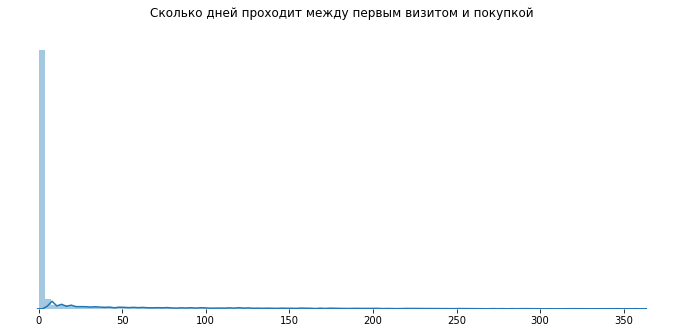

In [42]:
plt.figure(figsize=(12,5))
plt.title('Сколько дней проходит между первым визитом и покупкой', pad=20)
ax = sns.distplot(first, bins=100)
ax.tick_params(labelleft=False, left=False)
sns.despine(left=True, bottom=True)
print('')

**Это распределение Пуассона с ярко выраженным значением моды в 0 дней.** В данном случае, для ответа на поставленный вопрос, более рационально брать именно моду.

**Какой процент пользователей купили в свой первый визит?**

In [43]:
(first[first == 0].count() / first.count() * 100).round(0)

72.0

### Вывод

**72% пользователей совершают первую покупку в свой первый визит.**

<br/><br/><br/><br/><br/><br/>
AOV. Средний чек 
---

AOV — average order value.

**1. Добавляю в таблицу orders дату и месяц первой покупки, а также месяц каждого заказа в отдельный столбец**

In [44]:
orders = orders.join(first_order_date, on='uid')

In [45]:
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['order_date'].astype('datetime64[M]')

In [46]:
#orders.style.applymap(color='red', subset=['order_month'])
orders.head()

,order_date,revenue,uid,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


**Рассчитаю средний чек для первой покупки**

In [47]:
orders.pivot_table(index='uid', values=['first_order_date', 'revenue'], aggfunc='first')['revenue'].mean()

4.140442746837523

**2. Создаю отчет сгруппированный так: когорта, месяц жизни, сумма заказов, ко-во заказов**

In [48]:
report_aov = orders.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum', 'uid':'count'}).reset_index()
report_aov.columns = ['first_order_month', 'order_month', 'revenue', 'n_orders'] # Переименую столбец uid в n_orders
report_aov.head(5)

,first_order_month,order_month,revenue,n_orders
0,2017-06-01,2017-06-01,9557.49,2354
1,2017-06-01,2017-07-01,981.82,177
2,2017-06-01,2017-08-01,885.34,174
3,2017-06-01,2017-09-01,1931.30,226
4,2017-06-01,2017-10-01,2068.58,292


**3. Добавляю в когорту метку с возрастом (месяцем жизни)**

In [49]:
# Вычисляю кол-во месяцев между месяцем заказа и месяцем первого заказа
# Округляю до целого

report_aov['age'] = (report_aov['order_month'] - report_aov['first_order_month']) / np.timedelta64(1,'M')
report_aov['age'] = report_aov['age'].round().astype('int')
report_aov.head()

,first_order_month,order_month,revenue,n_orders,age
0,2017-06-01,2017-06-01,9557.49,2354,0
1,2017-06-01,2017-07-01,981.82,177,1
2,2017-06-01,2017-08-01,885.34,174,2
3,2017-06-01,2017-09-01,1931.30,226,3
4,2017-06-01,2017-10-01,2068.58,292,4


**4. Рассчитываю для каждого месяца среднюю выручку с клиента**

In [50]:
report_aov['aov'] = (report_aov['revenue']/report_aov['n_orders']).round(1)
report_aov.head()

,first_order_month,order_month,revenue,n_orders,age,aov
0,2017-06-01,2017-06-01,9557.49,2354,0,4.1
1,2017-06-01,2017-07-01,981.82,177,1,5.5
2,2017-06-01,2017-08-01,885.34,174,2,5.1
3,2017-06-01,2017-09-01,1931.30,226,3,8.5
4,2017-06-01,2017-10-01,2068.58,292,4,7.1


**Удаляю последнюю когорту**

Т.к. в ней всего 1 заказ:

In [51]:
report_aov.pivot_table(index='first_order_month', values='n_orders', aggfunc='sum')

,n_orders
first_order_month,
2017-06-01,4438
2017-07-01,2910
2017-08-01,2188
2017-09-01,3878
2017-10-01,6005
2017-11-01,5900
2017-12-01,5894
2018-01-01,4308
2018-02-01,4470


In [52]:
orders

,order_date,revenue,uid,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01
...,...,...,...,...,...,...
50409,2018-05-31 23:43:00,3.67,1805512004303848280,2018-05-31 23:43:00,2018-05-01,2018-05-01
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-01,2018-05-01


**5. Отчет-вывод**

In [53]:
output_aov = report_aov.pivot_table(index='first_order_month', columns='age', values='aov', aggfunc='mean')
output_aov.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.1,5.5,5.1,8.5,7.1,6.8,7,6.8,5.3,8,12,6
2017-07-01,5.3,6.4,10,6.6,4.7,3.7,3.8,5.5,5.3,11.8,5.6,
2017-08-01,4.7,6,6.3,6.6,8,6.3,5.9,7.1,8.7,5.6,,
2017-09-01,5.0,13.2,8.4,62.6,15.4,15.3,16.8,11.2,7.8,,,
2017-10-01,4.4,7.4,5.1,5.6,5.1,5.1,4.3,4,,,,
2017-11-01,4.4,4.1,4.5,6.3,4.4,3.7,4.6,,,,,
2017-12-01,4.1,4.2,20.1,26.1,15.9,14.1,,,,,,
2018-01-01,3.7,4.4,6.5,7.5,2.7,,,,,,,
2018-02-01,3.7,4.6,3.5,3.9,,,,,,,,


**6. Средний чек в первый месяц жизни когорт и за все время**

In [54]:
cohort_aov = report_aov.pivot_table(index='first_order_month', values='aov').reset_index()

In [55]:
# ДОбавляю для каждой когорты среднйи чек в первый месяц
cohort_aov = (pd.merge(cohort_aov, output_aov[0], left_on='first_order_month', right_on=output_aov.index)
              .rename(columns={0:'first_month_aov'})
             )

In [56]:
# Считаю изменение в %
cohort_aov['aov'] = cohort_aov['aov'].round(1)
cohort_aov['change_aov'] = (((cohort_aov['aov']/cohort_aov['first_month_aov']) * 100) - 100).round(0)
cohort_aov.head()

,first_order_month,aov,first_month_aov,change_aov
0,2017-06-01,6.8,4.1,66.0
1,2017-07-01,6.2,5.3,17.0
2,2017-08-01,6.5,4.7,38.0
3,2017-09-01,17.3,5.0,246.0
4,2017-10-01,5.1,4.4,16.0


### Резюме

**Описание метрики**

1. Средний чек для всех когорт за все время: 6.75 р (допустим, что это рубли).
2. Средний чек в первый месяц: 4.26. 
3. Средний чек растет в среднем на 56% во всех когортах.
4. Из 12 когорт 2 аномальные: сентябрь и декабрь 2017. Их средний чек вырос за это время на 250%. Это произошло благодая скачкообразному росту на 4, 5, 6-й месяц жизни этих когорт.

**Визуализация аномальных когорт**

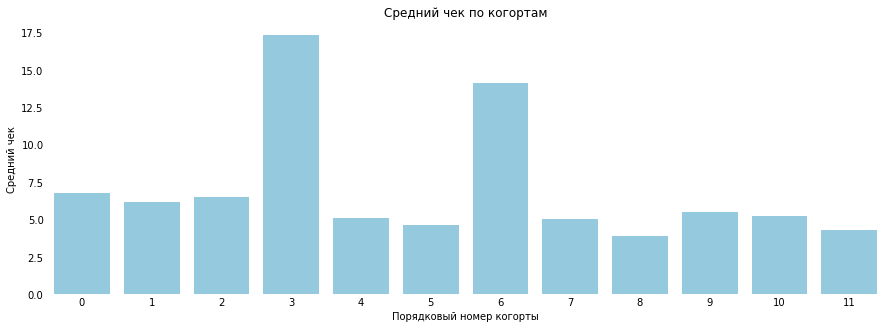

In [57]:
plt.figure(figsize=(15,5))
plt.title('Средний чек по когортам')
sns.despine(left=True, bottom=True) # Удалить линии осей


ax = sns.barplot(x=cohort_aov.index, y='aov', data=cohort_aov, color='SkyBlue', label='H')
#plt.xticks(rotation=45)
ax.tick_params(length = 0)
ax.set_xlabel('Порядковый номер когорты')
ax.set_ylabel('Средний чек')
print('')

Наглядно видно, что когорты сентября 2017 и декабря 2017 в 2 раза превосходят другие по размеру среднего чека.

**Изменение среднего чека по месяцам**

Рассотрим структуру роста детальнее.

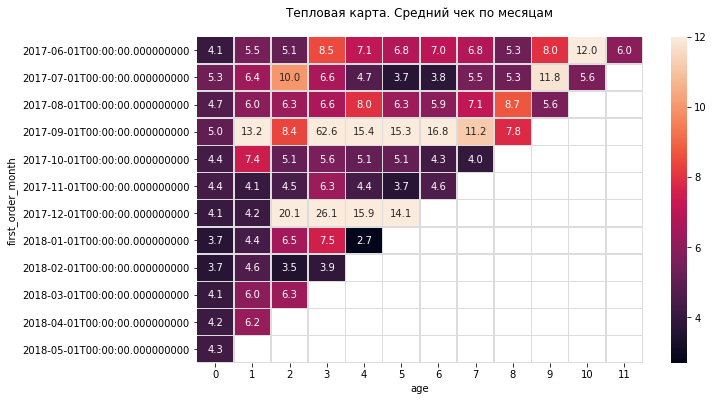

In [58]:
plt.figure(figsize=(10, 6))
plt.title('Тепловая карта. Средний чек по месяцам', pad=20)
sns.heatmap(output_aov, annot=True, fmt='.1f', linewidths=0.5, linecolor='Gainsboro', vmax=12)
print('')

**Вывод**

1. В аномальных когортах средний чек растет скачкообразно, на 4, 5 и 6-й месяц жизни.
2. В остальных когортах поведение среднего чека можно описать, как крайне медленный или плавный рост.

**Визуализация этого вывода на линейном графике**

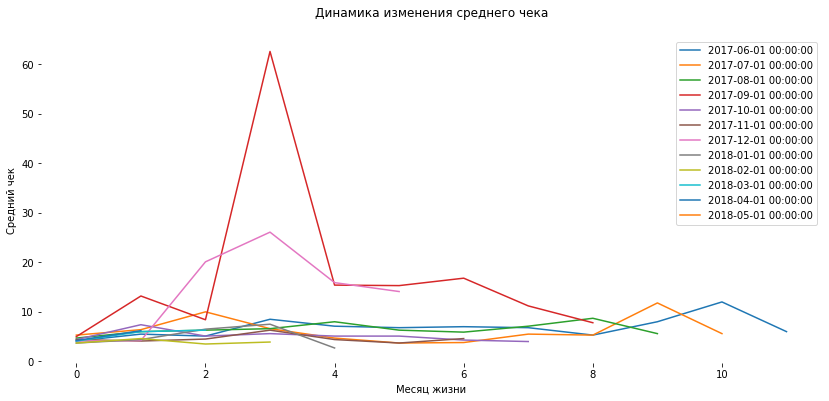

In [59]:
plt.figure(figsize=(14, 6))
plt.title('Динамика изменения среднего чека', pad=20)
sns.despine(left=True, bottom=True) # Удалить линии осей


for cohort in output_aov.index:
    #ax = output_aov.loc[cohort].plot(label=cohort)
    ax = sns.lineplot(data=output_aov.loc[cohort], dashes=False, label=cohort)

ax.set_xlabel('Месяц жизни')
ax.set_ylabel('Средний чек')
print('')

На графике хорошо заметен скачок среднего чека в когортах за сентября и декабря 2017 года. В первый месяц их средний чек аналогичен остальным.

### Выводы

Предложение для отдела маркетинга: изучить когорты сентября и декабря 2017 года более пристально.

<br/><br/><br/><br/><br/><br/>
LTV. Средняя выручка с клиента за период
---

**1. Вычисляю размер когорты**

In [60]:
cohort_size = orders.groupby('first_order_month').agg({'uid':'nunique'}).rename(columns={'uid':'cohort_size'})

In [61]:
cohort_size.head()

,cohort_size
first_order_month,
2017-06-01,2023
2017-07-01,1923
2017-08-01,1370
2017-09-01,2581
2017-10-01,4340


**2. Создаю отчет по когортам**

В качестве основы использую отчет report_aov со средним чеком, т.к. он уже сгруппирован так, как мне нужно.

In [62]:
report_ltv = pd.merge(report_aov, cohort_size, on='first_order_month')
report_ltv.head()

,first_order_month,order_month,revenue,n_orders,age,aov,cohort_size
0,2017-06-01,2017-06-01,9557.49,2354,0,4.1,2023
1,2017-06-01,2017-07-01,981.82,177,1,5.5,2023
2,2017-06-01,2017-08-01,885.34,174,2,5.1,2023
3,2017-06-01,2017-09-01,1931.30,226,3,8.5,2023
4,2017-06-01,2017-10-01,2068.58,292,4,7.1,2023


**3. Рассчитываю LTV**

In [63]:
report_ltv['ltv'] = report_ltv['revenue'] / report_ltv['cohort_size']
report_ltv.head()

,first_order_month,order_month,revenue,n_orders,age,aov,cohort_size,ltv
0,2017-06-01,2017-06-01,9557.49,2354,0,4.1,2023,4.724414
1,2017-06-01,2017-07-01,981.82,177,1,5.5,2023,0.485329
2,2017-06-01,2017-08-01,885.34,174,2,5.1,2023,0.437637
3,2017-06-01,2017-09-01,1931.30,226,3,8.5,2023,0.954671
4,2017-06-01,2017-10-01,2068.58,292,4,7.1,2023,1.022531


**4. Строю сводную таблицу-вывод**

In [64]:
output_ltv = report_ltv.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')
output_ltv = output_ltv.cumsum(axis=1)
output_ltv.round(1).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.7,5.2,5.6,6.6,7.6,8.4,9.3,9.9,10.4,11.1,11.6,11.9
2017-07-01,6.0,6.3,7,7.3,7.5,7.7,7.8,7.9,8.1,8.2,8.4,
2017-08-01,5.3,5.7,6.2,6.6,7.1,7.4,7.6,8,8.3,8.5,,
2017-09-01,5.6,6.8,7.3,11.3,11.7,12.3,13,13.3,13.4,,,
2017-10-01,5.0,5.5,5.7,5.9,6,6.2,6.2,6.4,,,,
2017-11-01,5.2,5.6,5.8,6.1,6.2,6.3,6.4,,,,,
2017-12-01,4.7,5,5.9,7,7.3,7.6,,,,,,
2018-01-01,4.1,4.4,4.7,4.9,4.9,,,,,,,
2018-02-01,4.2,4.4,4.5,4.6,,,,,,,,


### Резюме

**Накопительный LTV**

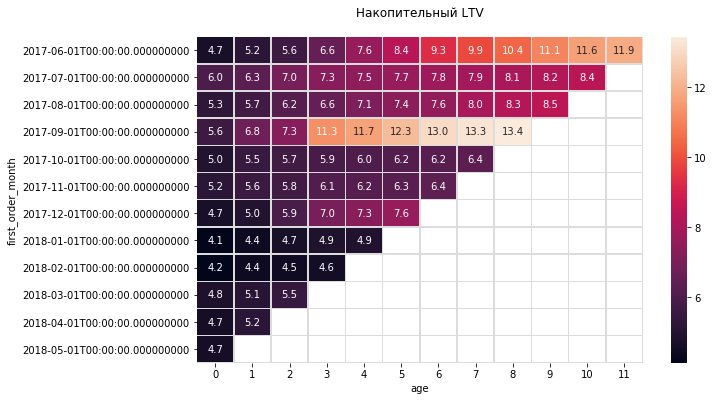

In [65]:
plt.figure(figsize=(10, 6))
plt.title('Накопительный LTV', pad=20)
sns.heatmap(output_ltv, annot=True, fmt='.1f', linewidths=0.5, linecolor='Gainsboro')
print('')

**Средний LTV по всем когортам на 6-й месяц жизни**

In [66]:
output_ltv[5].mean()

7.969052630207335

**Выводы**

1. LTV в когортах июня 2017 и сентября 2017 растет быстрее остальных. 
2. Особенно выделяется сентябрь 2017. LTV этой когорты начинает превышать отметку в 11 ед, начиная с 3 месяца жизни. Также, в этот месяц LTV увеличивается скачкообразно, с 7 до 11 ед. и в дальнейшем растет со скоростью, аналогичной другим когортам. Что объясняется ростом среднего чека в этой же когорте.
3. Однако, когорта-рекордсмен по среднему чеку, декабрь 2017, на тепловой карте LTV слабо выделяется как по динамике, так и по накопленному LTV. Это вопрос для дальнейшего изучения.
4. Худшие когорты: январь и февраль 2018. 

**Визуализация роста LTV**

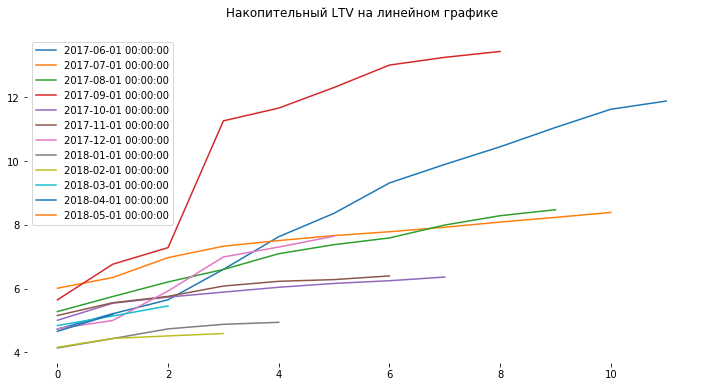

In [67]:
plt.figure(figsize=(12, 6))
plt.title('Накопительный LTV на линейном графике', pad=20)
sns.despine(left=True, bottom=True) # Удалить линии осей

for cohort in output_ltv.index:
    sns.lineplot(data=output_ltv.loc[cohort], dashes=False, label=cohort)

### Вывод

**Мои предложения для отдела маркетинга**
Скачкообразный рост в сентябрьской когорте произошел на 3-й месяц жизни, следоватльно это был декабрь 2018 года. Если этой произошло по причине некой новогодней акции, то стоит рассмотреть возможность ее повторения без привязки к НГ.

*Что интересно, в июньской когорте также заметен скачок в LTV в декабре 2017 года, но меньше, не на 4, а на 1 ед. Но для когорт между ними: июля и августа 2017, такого скачка в декабре нет. Стоит с этим разобраться.*

<br/><br/><br/><br/><br/><br/>
LTO. Количество покупок за период
---

**Как я понимаю эту задачу**

1. Сколько раз покупают за период — сколько заказов делает средний покупатель из когорты за период.
2. Поэтому посчитаю эту метрику аналогично LTV. Аналогично LTV назову эту метрику LTO (Liftime Orders)

**Рассчитаю LTO для каждой когорты по месяцам**

Как количество заказов в месяц, разделенное на размер когорты (в расчетах величина постоянная)

In [68]:
report_ltv['lto'] = (report_ltv['n_orders'] / report_ltv['cohort_size']).round(2)

In [69]:
report_ltv.head()

,first_order_month,order_month,revenue,n_orders,age,aov,cohort_size,ltv,lto
0,2017-06-01,2017-06-01,9557.49,2354,0,4.1,2023,4.724414,1.16
1,2017-06-01,2017-07-01,981.82,177,1,5.5,2023,0.485329,0.09
2,2017-06-01,2017-08-01,885.34,174,2,5.1,2023,0.437637,0.09
3,2017-06-01,2017-09-01,1931.30,226,3,8.5,2023,0.954671,0.11
4,2017-06-01,2017-10-01,2068.58,292,4,7.1,2023,1.022531,0.14


**Построю сводную таблицу**

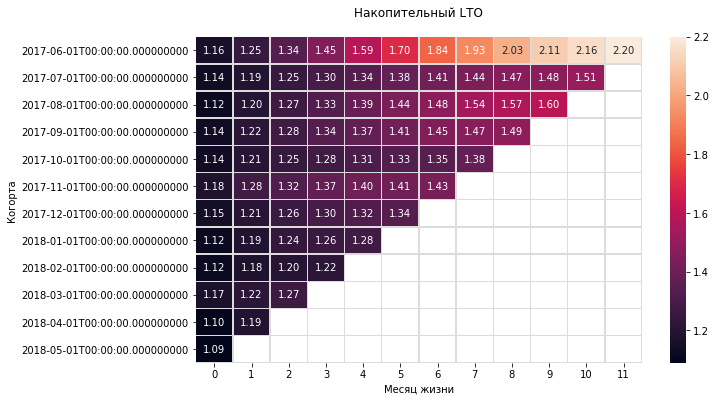

In [70]:
output_lto = report_ltv.pivot_table(index='first_order_month', columns='age', values='lto', aggfunc='mean')

plt.figure(figsize=(10, 6))
plt.title('Накопительный LTO', pad=20)
ax = sns.heatmap(output_lto.cumsum(axis=1), annot=True, fmt='.2f', linewidths=0.5, linecolor='Gainsboro')
ax.set_xlabel('Месяц жизни')
ax.set_ylabel('Когорта')
print('')

**Выводы**

1. В первый месяц у всех когорт среднее кол-во покупок на пользователя находится в диапазоне 1.10—1.18. Другими словами, на одного покупателя приходится 1.10 покупок.
2. Дальнейшая динамика увеличения LTO схожа по всем когортам, кроме первой за июнь 2017. Начиная с 4-о месяца она незначительно опережает остальные когорты по накопленному кол-ву покупок на поьзователя.


### Кол-во заказов по периодам

Для расчета заказов в день добавляю в orders столбец с датой заказа, округленной до дня (отбрасываю минуты и секунды), а для расчета заказов в неделю добавляю первый день недели, в который был сделан заказ (первый день становится меткой недели):

In [71]:
# Добавлю  столбец с днем
orders['order_date_day'] = orders['order_date'].astype('datetime64[D]')

# Добавляю столбец с днем начала недели
orders['week_first_day'] = (pd.to_datetime(orders['order_date_day'], unit='d') - 
                            pd.to_timedelta(orders['order_date_day'].dt.dayofweek, unit='d') )

**Испульзуя метод decribe, рассчитываю средние значения и медианы**

In [72]:
orders_per_day = orders.pivot_table(index='order_date_day', values='uid', aggfunc='count').describe().rename(columns={'uid':'orders_per_day'})
orders_per_week = orders.pivot_table(index='week_first_day', values='uid', aggfunc='count').describe().rename(columns={'uid':'orders_per_week'})
orders_per_month = orders.pivot_table(index='order_month', values='uid', aggfunc='count').describe().rename(columns={'uid':'orders_per_month'})

**Объединяю данные в один отчет**

In [73]:
(
    orders_per_day.merge(orders_per_week, left_index=True, right_index=True)
    .merge(orders_per_month, left_index=True, right_index=True)
    .astype('int')
)

,orders_per_day,orders_per_week,orders_per_month
count,363,53,12
mean,138,951,4201
std,76,396,1511
min,15,314,1807
25%,83,636,3045
50%,136,991,4533
75%,177,1257,5409
max,814,1894,6218


**Выводы**

1. Пользователи совершают в среднем 138 заказов в день, 951 в неделю, и 4201 в месяц.
2. Средние и медианы всех значений очень близки, что говорит об отсутсвии значимых хвостов и выбросов в данных. Даже без графика понятно, что распределние средних носит нормальных характер.

### Динамика заказов по месяцам

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


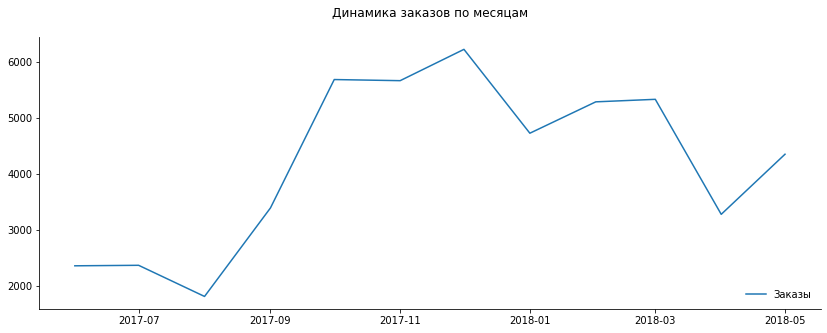

In [74]:
plt.figure(figsize=(14, 5))
plt.title('Динамика заказов по месяцам', pad=20)
sns.despine(left=False, bottom=False) # Удалить линии осей


ax = sns.lineplot(data=orders.pivot_table(index='order_month', values='uid', aggfunc='count'), dashes=False)
ax.legend(['Заказы'], ncol=1, loc="lower right", frameon=False)
ax.set_xlabel('')
print('')

**Выводы**

1. Спрос на услуги сервиса носит сезонный характер.
2. Сезонность представлена 2 периодами роста спроса: с августа по декабрь, и с января по март.
3. Периоды снижения спроса: декабрь, апрель, июнь и июль. Или по другому: Новый год, дача, летний отдых.

<br/><br/><br/><br/><br/><br/>
Маркетинговые метрики—————————————————————————————————————
===


**Что необходимо рассчитать**

1. Расходы
    * По времени (месяцам)
    * По источникам
    * Суммарные
2. Сколько стоило привлечение одного покупателя из каждого источника? (CAC)
3. На сколько окупились расходы? (ROI)

Расходы по месяцам
---

**1. Добавляю в таблицу год и месяц расхода по рекламе**

In [75]:
costs['costs_year'] = costs['costs_date'].dt.year
costs['costs_month'] = costs['costs_date'].astype('datetime64[M]')
costs.head()

,source_id,costs_date,costs,costs_year,costs_month
0,1,2017-06-01,75.20,2017,2017-06-01
1,1,2017-06-02,62.25,2017,2017-06-01
2,1,2017-06-03,36.53,2017,2017-06-01
3,1,2017-06-04,55.00,2017,2017-06-01
4,1,2017-06-05,57.08,2017,2017-06-01


**2. Группирую расходы по месяцам**

In [76]:
costs_in_time = costs.groupby(['costs_year', 'costs_month']).agg({'costs':'sum'}).reset_index()
costs_in_time.columns = ['costs_year', 'costs_month', 'monthly_costs']
costs_in_time.head()

,costs_year,costs_month,monthly_costs
0,2017,2017-06-01,18015.00
1,2017,2017-07-01,18240.59
2,2017,2017-08-01,14790.54
3,2017,2017-09-01,24368.91
4,2017,2017-10-01,36322.88


**3. Расходы по месяцам: среднее, минимум, максимум**

In [77]:
print(int(costs_in_time['monthly_costs'].mean()))
print(int(costs_in_time['monthly_costs'].min()))
print(int(costs_in_time['monthly_costs'].max()))
print(int(costs_in_time['monthly_costs'].sum()))

27427
14790
38315
329131


**Вывод**

1. Средний расход рекламного бюджета в месяц: 27427 руб
2. Минимальный, 14790 (зафиксирован в августе 2017 года), максимальный 38315 руб (декабрь 2017)
3. Общая сумма затрат за 12 мес: 329131 руб

**Визуализация динамики расходов:**

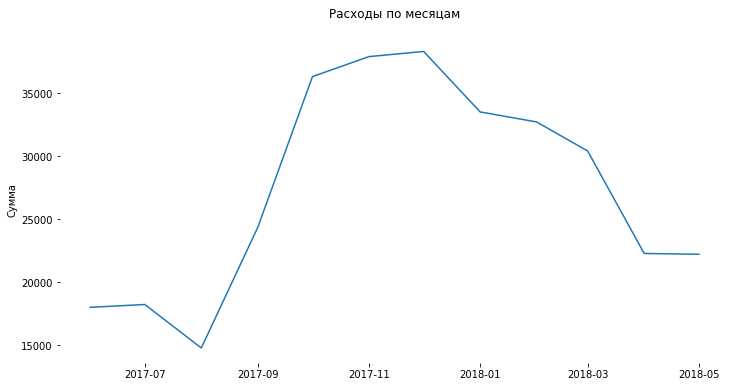

In [78]:
plt.figure(figsize=(12, 6))
plt.title('Расходы по месяцам', pad=20)
sns.despine(left=True, bottom=True) # Удалить линии осей

ax = sns.lineplot(x='costs_month', y='monthly_costs', data=costs_in_time)
ax.set_ylabel('Сумма')
ax.set_xlabel('')
print('')

**Затраты растут перед Новым годом и уменьшаются сразу после него. Классическая картина для бизнеса.**

<br/><br/><br/><br/><br/><br/>
Расходы по источникам
---

**1. Создаю сводную таблицу**

In [79]:
output_si = costs.pivot_table(index='source_id', columns='costs_month', values='costs', aggfunc='sum')
output_si.head()

costs_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
source_id,,,,,,,,,,,,
1,1125.61,1072.88,951.81,1502.01,2315.75,2445.16,2341.20,2186.18,2204.48,1893.09,1327.49,1467.61
2,2427.38,2333.11,1811.05,2985.66,4845.00,5247.68,4897.80,4157.74,4474.34,3943.14,2993.70,2689.44
3,7731.65,7674.37,6143.54,9963.55,15737.24,17025.34,16219.52,14808.78,14228.56,13080.85,9296.81,9411.42
4,3514.80,3529.73,3217.36,5192.26,6420.84,5388.82,7680.47,5832.79,5711.96,5961.87,4408.49,4214.21
5,2616.12,2998.14,2185.28,3849.14,5767.40,6325.34,5872.52,5371.52,5071.31,4529.62,3501.15,3669.56


**2. Рассчитываю метрики: максимальные и минимальные вложения по источникам, среднее**

In [80]:
costs.groupby('source_id').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)

,costs
source_id,
3,141321.63
4,61073.60
5,51757.10
2,42806.04
1,20833.27
10,5822.49
9,5517.49


**Вывод**

1. Всего в отчете 7 источников с номерами от 1 до 11
2. В данных не хватает источников с номерами 6, 7 и 8. Вероятно, это Goggle Adwords, Google КМС и YouTube. Но это не точно.
3. Максимальные инвестиции вложены в источник №3: 141321 р.
4. Минимальные в источник №9: 5517 р.
5. В среднем в каждый источник было вложено 47000 р *(хотя, как я думаю, эта цифра ничего не дает).*

**Визуализирую динамику:**

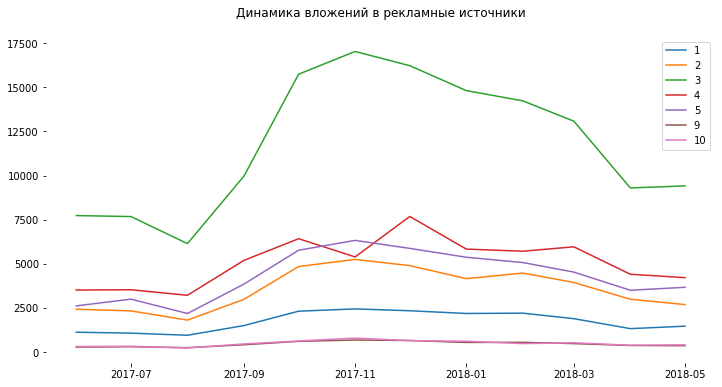

In [81]:
plt.figure(figsize=(12, 6))
plt.title('Динамика вложений в рекламные источники', pad=20)
sns.despine(left=True, bottom=True) # Удалить линии осей

for source in output_si.index:
    sns.lineplot(data=output_si.loc[source], dashes=False, label=source)

1. Динамика вложений по источникам повторяет картину суммарных ежемесячных расходов с пиком в декабре 2017.
2. Выделяется источник №3, в него изначально вложили больше, а после летних месяцев намного больше, чем в остальные.

**Вопрос в отдел разработки**

Почему в отчете не хватает источников номер 6, 7 и 8? Если это ошибка, исправьте.

<br/><br/><br/><br/><br/><br/>
CAC. Сумма привлечения нового пользователя в разрезе по источникам
---

**План**

1. Сгруппировать визиты так: индекс = Uid, значение = последний (или первый) источник трафика
2. Объединить эту таблицу с таблицей orders, добавив тем самым, к каждому uid источник трафика, по которому он пришел
3. Сводная таблица из orders с такой группировкой: первый месяц, ресурс, всего покупателей
4. Сводная таблица из costs: месяц, источник, расходы
5. Объединить сводную таблицу orders и сводную таблицу costs по полю месяц и источник
6. Добавляю в таблицу CAC
7. Строю сводную таблицу: когорта, CAC по источнику

**1. Сгруппирую визиты так: uid, последний ресурс**

In [82]:
visits_pivot = visits.pivot_table(index='uid', values='source_id', aggfunc='last').reset_index()
visits_pivot.head()

,uid,source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


**Почему я беру последний рекламный источник, а не первый?**

Потому что в маркетинге есть такое правило: в качестве источника клиента считается последний, а не первый, из которого был соврешен переход.

**2. Объединяю эту таблицу с таблицей orders**

In [83]:
orders = pd.merge(visits_pivot, orders, on='uid')
orders.head()

,uid,source_id,order_date,revenue,first_order_date,first_order_month,order_month,order_date_day,week_first_day
0,313578113262317,2,2018-01-03 21:51:00,0.55,2018-01-03 21:51:00,2018-01-01,2018-01-01,2018-01-03,2018-01-01
1,1575281904278712,10,2017-06-03 10:13:00,1.22,2017-06-03 10:13:00,2017-06-01,2017-06-01,2017-06-03,2017-05-29
2,1575281904278712,10,2017-06-03 17:39:00,1.83,2017-06-03 10:13:00,2017-06-01,2017-06-01,2017-06-03,2017-05-29
3,2429014661409475,3,2017-10-11 18:33:00,73.33,2017-10-11 18:33:00,2017-10-01,2017-10-01,2017-10-11,2017-10-09
4,2464366381792757,5,2018-01-28 15:54:00,2.44,2018-01-28 15:54:00,2018-01-01,2018-01-01,2018-01-28,2018-01-22


**3. Создаю сводную таблицу из orders с такой группировкой: первый месяц, ресурс, всего покупателей**

In [84]:
orders_pivot = orders.pivot_table(index=['first_order_month', 'source_id'], values='uid', aggfunc={'uid':'nunique'}).reset_index()
orders_pivot.head()

,first_order_month,source_id,uid
0,2017-06-01,1,223
1,2017-06-01,2,270
2,2017-06-01,3,584
3,2017-06-01,4,403
4,2017-06-01,5,365


**4. Сводная таблица из costs: месяц, источник, расходы**

In [85]:
costs_new = costs.pivot_table(index=['costs_month', 'source_id'], values='costs', aggfunc='sum').reset_index()
costs_new.head()

,costs_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


**5. Объединяю сводную таблицу orders и сводную таблицу costs по полю месяц и источник**

In [86]:
report_cac = pd.merge(costs_new, orders_pivot, left_on=['costs_month', 'source_id'], right_on=['first_order_month', 'source_id'])
report_cac.head()

,costs_month,source_id,costs,first_order_month,uid
0,2017-06-01,1,1125.61,2017-06-01,223
1,2017-06-01,2,2427.38,2017-06-01,270
2,2017-06-01,3,7731.65,2017-06-01,584
3,2017-06-01,4,3514.80,2017-06-01,403
4,2017-06-01,5,2616.12,2017-06-01,365


**6. Добавляю в таблицу CAC**

In [87]:
report_cac['cac'] = report_cac['costs']/report_cac['uid']
report_cac.head()

,costs_month,source_id,costs,first_order_month,uid,cac
0,2017-06-01,1,1125.61,2017-06-01,223,5.047578
1,2017-06-01,2,2427.38,2017-06-01,270,8.990296
2,2017-06-01,3,7731.65,2017-06-01,584,13.239127
3,2017-06-01,4,3514.80,2017-06-01,403,8.721588
4,2017-06-01,5,2616.12,2017-06-01,365,7.167452


**7. CAC для каждой когорты по источникам**

In [88]:
output_cac = report_cac.pivot_table(index='costs_month', columns='source_id', values='cac')
output_cac

source_id,1,2,3,4,5,9,10
costs_month,,,,,,,
2017-06-01,5.047578,8.990296,13.239127,8.721588,7.167452,3.034255,3.740714
2017-07-01,5.558964,8.973500,16.941214,7.338316,7.241884,4.322000,6.342692
2017-08-01,6.564207,11.760065,20.342848,9.661742,6.703313,3.319067,6.840294
2017-09-01,5.625506,10.224863,14.695501,8.815382,6.602298,4.115050,6.488310
2017-10-01,5.311353,10.178571,15.581426,5.535207,6.502142,3.348407,3.318730
2017-11-01,5.304035,9.957647,16.773734,4.833022,9.612979,3.539793,7.074643
2017-12-01,4.739271,10.443070,14.494656,5.761793,8.224818,3.717401,8.387792
2018-01-01,6.624788,12.264720,16.657795,5.915609,8.677738,4.716897,6.535638
2018-02-01,5.740833,11.995550,15.136766,5.445148,7.490857,5.202830,3.941639


Резюме
---

**CAC по всем источникам за все время**

In [89]:
print('Средняя сумма вложений в нового клиента равна:', round(costs['costs'].sum()/orders['uid'].nunique(), 2))

Средняя сумма вложений в нового клиента равна: 9.01


**CAC в разрезе для каждого источника**

In [90]:
rating_source_by_cac = report_cac.pivot_table(index='source_id', values='cac', aggfunc='mean').sort_values(by='cac').reset_index()
rating_source_by_cac.index = rating_source_by_cac.index + 1
rating_source_by_cac.round(2)

,source_id,cac
1,9,4.43
2,10,5.23
3,1,5.54
4,4,6.67
5,5,7.62
6,2,10.23
7,3,15.69


1. Третий источник самый дорогой: 15,69 р за клиента
2. Девятый самый дешевый: 4,43 р за клиента при среднем в 9 р.

**CAC по когортам**

In [91]:
# Создаю еще один отчет, в котором просуммирую для каждой когорты сумму вложений и кол-во новых юзеров
# Поделю первое на второе
# Так получу CAC по когортам

report_cac_2 = report_cac.pivot_table(index='first_order_month', values=['costs', 'uid'], aggfunc='sum')
report_cac_2['cac'] = report_cac_2['costs']/report_cac_2['uid']
report_cac_2.head()

,costs,uid,cac
first_order_month,,,
2017-06-01,18015.00,2023,8.905091
2017-07-01,18240.59,1923,9.485486
2017-08-01,14790.54,1369,10.803901
2017-09-01,24368.91,2581,9.441654
2017-10-01,36322.88,4340,8.369327


**Визуализация динамики**

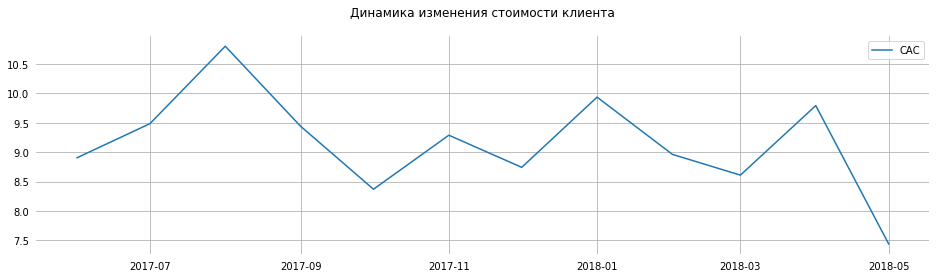

In [92]:
plt.figure(figsize=(16, 4))
plt.title('Динамика изменения стоимости клиента', pad=20)
sns.despine(left=True, bottom=True) # Удалить линии осей

ax = sns.lineplot(data=report_cac_2['cac'] , dashes=False, label='CAC')
ax.tick_params(labelleft=True, left=False, bottom=False)
plt.grid(True)
print('')

**Вывод.** 

По данному графику сложно судить о некой тенденции к снижению или росту.


Если брать за точку отсчета августовский пик (визуально взгляд именно за него и цепляется), то можно говорить о снижении CAC рекламных компаний. Но этот же пик может быть результатом сезонного повышенного спроса на представленную услугу. Обратное, без апрельского снижения какой то тенденции к снижению также не будет видно.

Поскольку каждое снижение-повышение стоимости клиента может быть объяснено сезонностью продукта. Поэтому конкретно для решения задачи как проектной работы, я остановлюсь на выводе о сезонном колебании стоимости CAC без явной тенденции к снижению или пвышению стоимости клиента.


*В реальной работе я бы обратился к маркетолог за разъяснениями, есть ли сезонность у услуги и какая специфика у каждого источника.*

**CAC по когортам в разрезе по источникам**

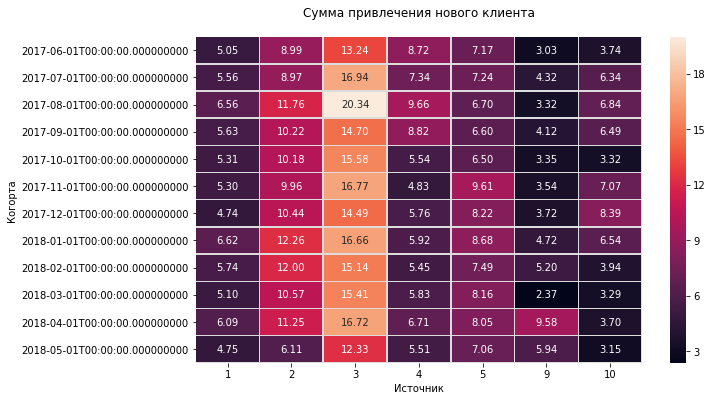

In [93]:
plt.figure(figsize=(10, 6))
plt.title('Сумма привлечения нового клиента', pad=20)
ax = sns.heatmap(output_cac, annot=True, fmt='.2f', linewidths=0.5, linecolor='Gainsboro', vmax=20)
ax.set_xlabel('Источник')
ax.set_ylabel('Когорта')
print('')

**Вывод**

1. Для каждой когорты характерно распределение стоимости клиента от меньшего к большему.
2. Источник №3 не только лидер по инвестициям, но у него же самая высокая стоимость привлечения нового клиента: 15,69р против 9р в среднем.
3. Наблюдаются аномалия, 9-й источник для апрельской когорты, его CAC равен 9.58, что в 1.5-3 раза превышает стоимость клиента в другие месяцы. Для других источников также характерно снижение-повышение стоимости клиента, но более плавное от месяца к месяцы. В апрельской когорте стоимость клиента поднимается резко и значительно.

Для описания динамики визуализирую отчет.

**Визуализация динамики по источникам**

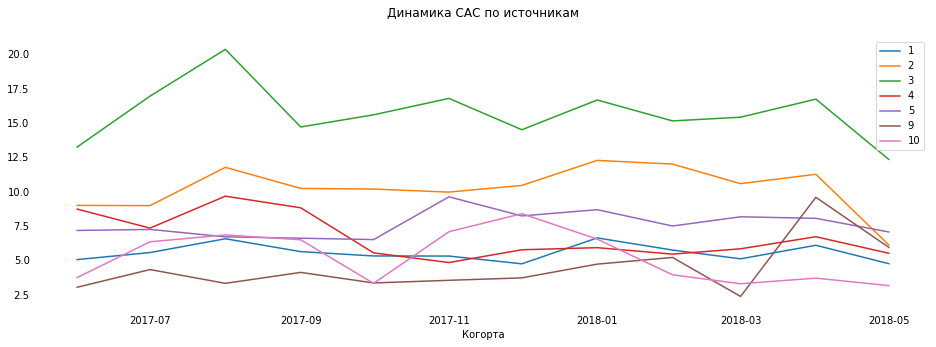

In [94]:
plt.figure(figsize=(16, 5))
plt.title('Динамика CAC по источникам', pad=20)
sns.despine(left=True, bottom=True) # Удалить линии осей

for source in [1,2,3,4,5,9,10]:
    ax = sns.lineplot(data=output_cac[source], dashes=False, label=source)
ax.set_xlabel('Когорта')
ax.tick_params(labelleft=True, left=False, bottom=False)
print('')

**Вывод**

Данный график подтверждает сделанный выше вывод о сезонном колебании стоимости CAC без явной тенденции к снижению или пвышению стоимости клиента.

**Предложение маркетологам. Рассмотрите возможность отказаться от 3-го источника.**

Даже минимальная стоимость клиента в 12.33р превышает накопленный LTV за 1 год для первой когорты, которая явлется лучшей из всех(кроме аномальной сентябрьской). Остальные когорты растут на 20-30% медленне. А это значит, что клиент из этого источника будет окупаться, как минимум за 1.5 года.

Если же исходить из средней стоимости клиента в 15.7р (среднее для 3-го источника), то окупается оказывается много больше 1.5 лет. Если вообще окупится, т.к. через год продолжают покупать всего 5% пользователей.

*Понимаю, что здесь хорошо бы построить прогнозную модель и описать цифры точнее. Но пока я это не умею:(( Хорошо, что это у нас еще будет.*

<br/><br/><br/><br/><br/><br/>
ROI. Окупаемость инвестиций в маркетинг
---

**1. Считаю суммарные расходы на рекламу для каждой когорты**

Сгруппирую отчет для CAC таким образом: первый месяц покупки (когорта), суммарные расходы

In [95]:
costs_by_month = report_cac.pivot_table(index='first_order_month', values='costs', aggfunc='sum').reset_index()

In [96]:
costs_by_month.head()

,first_order_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


**2. Создаю отчет для ROI**

Путем объединения расходов по месяцам с отчетом по LTV. Напомню, он выглядит вот так:

In [97]:
report_ltv.head()

,first_order_month,order_month,revenue,n_orders,age,aov,cohort_size,ltv,lto
0,2017-06-01,2017-06-01,9557.49,2354,0,4.1,2023,4.724414,1.16
1,2017-06-01,2017-07-01,981.82,177,1,5.5,2023,0.485329,0.09
2,2017-06-01,2017-08-01,885.34,174,2,5.1,2023,0.437637,0.09
3,2017-06-01,2017-09-01,1931.30,226,3,8.5,2023,0.954671,0.11
4,2017-06-01,2017-10-01,2068.58,292,4,7.1,2023,1.022531,0.14


Объединяю таблицы:

In [98]:
report_roi = pd.merge(report_ltv, costs_by_month, on='first_order_month').rename(columns={'costs':'cohort_cost'})

In [99]:
report_roi.head()

,first_order_month,order_month,revenue,n_orders,age,aov,cohort_size,ltv,lto,cohort_cost
0,2017-06-01,2017-06-01,9557.49,2354,0,4.1,2023,4.724414,1.16,18015.0
1,2017-06-01,2017-07-01,981.82,177,1,5.5,2023,0.485329,0.09,18015.0
2,2017-06-01,2017-08-01,885.34,174,2,5.1,2023,0.437637,0.09,18015.0
3,2017-06-01,2017-09-01,1931.30,226,3,8.5,2023,0.954671,0.11,18015.0
4,2017-06-01,2017-10-01,2068.58,292,4,7.1,2023,1.022531,0.14,18015.0


**3. Рассчитываю ROI**

Как выручка за месяц, деленное на суммарные расходы на когорту

In [100]:
report_roi['roi'] = report_roi['revenue'] / report_roi['cohort_cost']

In [101]:
report_roi.head()

,first_order_month,order_month,revenue,n_orders,age,aov,cohort_size,ltv,lto,cohort_cost,roi
0,2017-06-01,2017-06-01,9557.49,2354,0,4.1,2023,4.724414,1.16,18015.0,0.530530
1,2017-06-01,2017-07-01,981.82,177,1,5.5,2023,0.485329,0.09,18015.0,0.054500
2,2017-06-01,2017-08-01,885.34,174,2,5.1,2023,0.437637,0.09,18015.0,0.049145
3,2017-06-01,2017-09-01,1931.30,226,3,8.5,2023,0.954671,0.11,18015.0,0.107205
4,2017-06-01,2017-10-01,2068.58,292,4,7.1,2023,1.022531,0.14,18015.0,0.114825


**4. Группирую данные в удобную таблицу**

In [102]:
output_roi = report_roi.pivot_table(index='first_order_month', columns='age', values='roi')
output_roi = output_roi.cumsum(axis=1)

**Визуализация отчета**

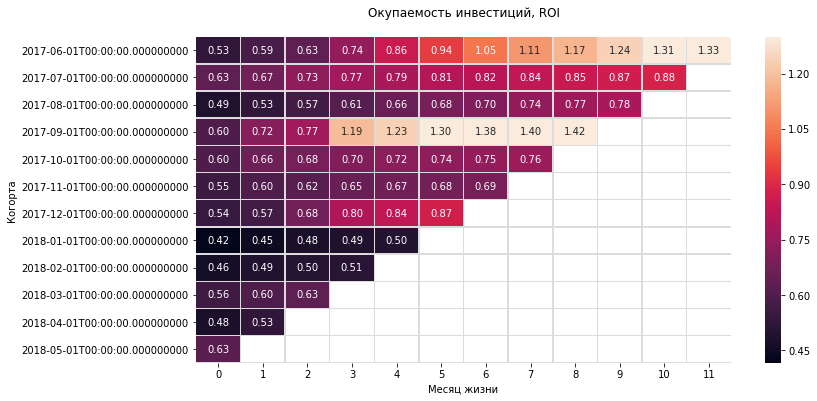

In [103]:
plt.figure(figsize=(12, 6))
plt.title('Окупаемость инвестиций, ROI', pad=20)
ax = sns.heatmap(output_roi, annot=True, fmt='.2f', linewidths=0.5, linecolor='Gainsboro', vmax=1.3)
ax.set_xlabel('Месяц жизни')
ax.set_ylabel('Когорта')
print('')

**Выводы**

1. За 12 месяцев окупились 2 когорты: за июнь и сентябрь 2017.
    * Первая когорта окупилась на 6-й мес жизни
    * Вторая когорта на 3-й. Однако, замечу, эта когорта аномальна, ее показатели окупаемости такие выоские благодаря резкому росту среднего чека на 3-й мес жизни.
2. Общая тенденция: снижения скорости окупаемости инвестиций. Так, для 1-й когорты на 6-й месяц ROI составляет 1.05, для 2-й 0.82, 3-й 0.70 и т.д., за исключением аномальной. Данное наблюдение лего объясняется: средний чек растет гораздо медленне стоимсоти привлечения нового пользователя. Поэтому каждая последующая когорта стоит дороже, а покупает также.


**Абсолютные цифры**
1. За 12 мес в рекламу вложено 239131 р, доход составил 252053 р.
2. Текущее состояние проекта: убыток в 77077 р

<br/><br/><br/><br/><br/><br/>
# Retention Rate

Retention Rate по когортам
---

**1. Вычисляю дату первого визита пользователя**

In [104]:
first_visits = visits.groupby('uid')['session_start_ts'].min()

In [105]:
first_visits.name = 'first_visits_date'

In [106]:
first_visits.reset_index()

,uid,first_visits_date
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
228164,18446403737806311543,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00


**2. Добавляю дату в visits и округляю до месяца**

In [107]:
visits = pd.merge(first_visits, visits, on='uid')

In [108]:
visits['first_visits_date'] = visits['first_visits_date'].astype('datetime64[M]')

**3. Добавляю месяц жизни юзера**

In [109]:
visits['session_date'] = visits['session_start_ts'].astype('datetime64[M]')

In [110]:
visits['lifetime_month'] = (visits['session_date'] - visits['first_visits_date']) / np.timedelta64(1,'M')
visits['lifetime_month'] = visits['lifetime_month'].round().astype('int')
visits.head()

,uid,first_visits_date,device,session_end_ts,source_id,session_start_ts,session_day,session_week,session_month,session_year,session_date,duration_sessions_sec,lifetime_month
0,11863502262781,2018-03-01,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,1,9,3,2018,2018-03-01,360,0
1,49537067089222,2018-02-01,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,6,6,2,2018,2018-02-01,120,0
2,297729379853735,2017-06-01,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,7,23,6,2017,2017-06-01,60,0
3,313578113262317,2017-09-01,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,11,10,3,2018,2018-03-01,360,6
4,313578113262317,2017-09-01,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,18,38,9,2017,2017-09-01,1080,0


**4. Группирую данные по когорте и месяцу жизни**

In [111]:
cohorts_visits = visits.groupby(['first_visits_date', 'lifetime_month']).agg({'uid':'nunique'}).reset_index()
cohorts_visits.head()

,first_visits_date,lifetime_month,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


**5. Добавляю размер когорты**

In [112]:
visits_cohort_size = cohorts_visits[cohorts_visits['lifetime_month'] == 0][['first_visits_date', 'uid']].rename(columns={'uid':'cohort_size'})
visits_cohort_size

,first_visits_date,cohort_size
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


**6. Объединяю таблицы**

In [113]:
cohorts_visits = cohorts_visits.merge(visits_cohort_size, on='first_visits_date')
cohorts_visits.head()

,first_visits_date,lifetime_month,uid,cohort_size
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


**7. Рассчитываю Retention Rate**

In [114]:
cohorts_visits['retention'] = cohorts_visits['uid']/cohorts_visits['cohort_size']
cohorts_visits.head()

,first_visits_date,lifetime_month,uid,cohort_size,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


**8. Собираю сводную таблицу-отчет**

In [115]:
retention_month = cohorts_visits.pivot_table(index='first_visits_date', 
                                             columns='lifetime_month', 
                                             values='retention')

**9. Тепловая карта отчета**

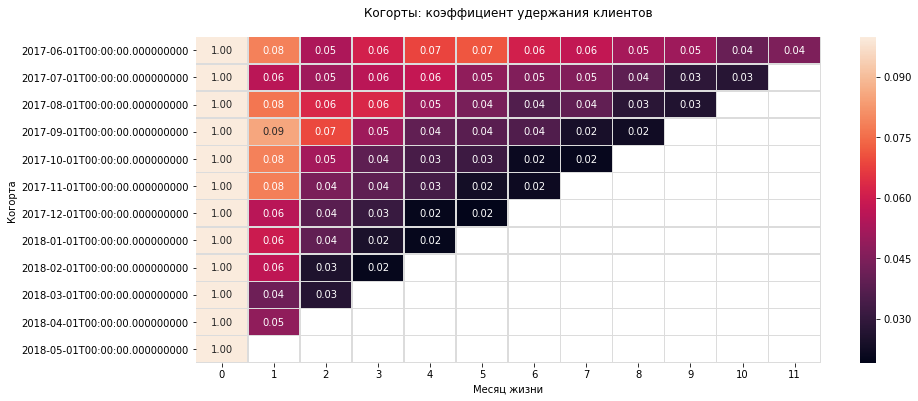

In [116]:
plt.figure(figsize=(14, 6))
plt.title('Когорты: коэффициент удержания клиентов', pad=20)
ax = sns.heatmap(retention_month, annot=True, fmt='.2f', linewidths=0.5, linecolor='Gainsboro', vmax=0.1)
ax.set_xlabel('Месяц жизни')
ax.set_ylabel('Когорта')
print('')

**Retention Rate внутри когорты можно описать как ожидаемый и нормальный.** Он снижается с возрастом когорты. Это снижение во всех носит линейный характер. Аномалий и особенностей не обнаружено.

**Retention Rate имеет тенденцию к снижению с каждой новой когортой.** Визуализирую этот смысл на графике:

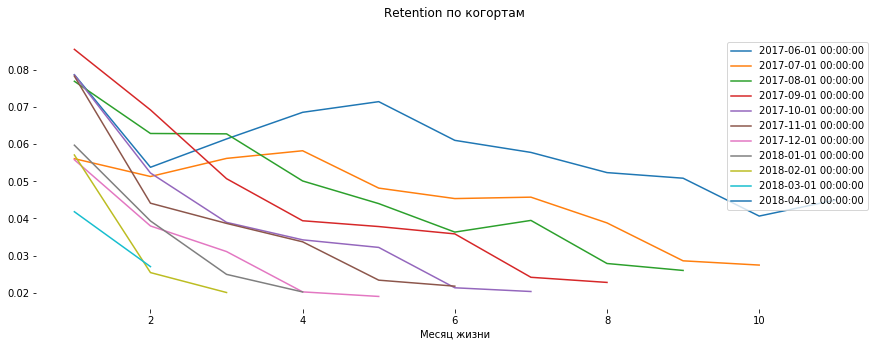

In [117]:
plt.figure(figsize=(15, 5))
plt.title('Retention по когортам', pad=20)
sns.despine(left=True, bottom=True) # Удалить линии осей

for cohort in retention_month.index:
    ax = sns.lineplot(data=retention_month.drop(columns=0).loc[cohort], dashes=False, label=cohort)
ax.set_xlabel('Месяц жизни')
print('')

*График построен без 0-нулевого месяца для наглядности*

**Динамика Retention с течением времени отрицательная.** В новых когортах Retention ниже, чем в старых, что наглядно видно на графике. 

**Также в когортах июня и июля наблюдается локальный рост** на 2 месяц жизни. Что я объясняю началом сезона кино и театров в сентябре. Июньская же когрта является лучшей из представленных по удержанию клиентов.

<br/><br/><br/><br/><br/><br/>
Retention Rate по устройствам
---

**1. Создаю таблицу: девайс, месяц жизни, кол-в юзеров**

In [118]:
cohorts_device = visits.groupby(['device', 'lifetime_month']).agg({'uid':'nunique'}).reset_index()
cohorts_device.head()

,device,lifetime_month,uid
0,desktop,0,162174
1,desktop,1,10258
2,desktop,2,6551
3,desktop,3,5234
4,desktop,4,4304


**2. Вычисляю размер когорт**

In [119]:
device_cohort_size = cohorts_device[cohorts_device['lifetime_month'] == 0][['device', 'uid']].rename(columns={'uid':'cohort_size'})
device_cohort_size

,device,cohort_size
0,desktop,162174
12,touch,68358


**3. Объединяю таблицы**

In [120]:
cohorts_device = cohorts_device.merge(device_cohort_size, on='device')
cohorts_device.head()

,device,lifetime_month,uid,cohort_size
0,desktop,0,162174,162174
1,desktop,1,10258,162174
2,desktop,2,6551,162174
3,desktop,3,5234,162174
4,desktop,4,4304,162174


**4. Рассчитываю Retention**

In [121]:
cohorts_device['retention'] = (cohorts_device['uid'] / cohorts_device['cohort_size']) * 100
cohorts_device.head()

,device,lifetime_month,uid,cohort_size,retention
0,desktop,0,162174,162174,100.000000
1,desktop,1,10258,162174,6.325305
2,desktop,2,6551,162174,4.039488
3,desktop,3,5234,162174,3.227398
4,desktop,4,4304,162174,2.653940


**4. Собираю сводную таблицу-отчет**

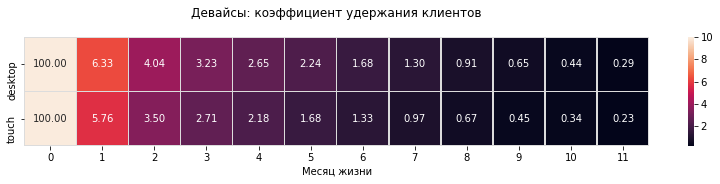

In [122]:
output_device_retention = cohorts_device.pivot_table(index='device', columns='lifetime_month', values='retention')

plt.figure(figsize=(14, 2))
plt.title('Девайсы: коэффициент удержания клиентов', pad=20)
ax = sns.heatmap(output_device_retention, annot=True, fmt='.2f', linewidths=0.5, linecolor='Gainsboro', vmax=10)
ax.set_xlabel('Месяц жизни')
ax.set_ylabel('')
print('')

**Вывод.** Десктопы незначительно превосходят мобильные устройства по метрике удержания клиентов. Посмотрим на динамику:

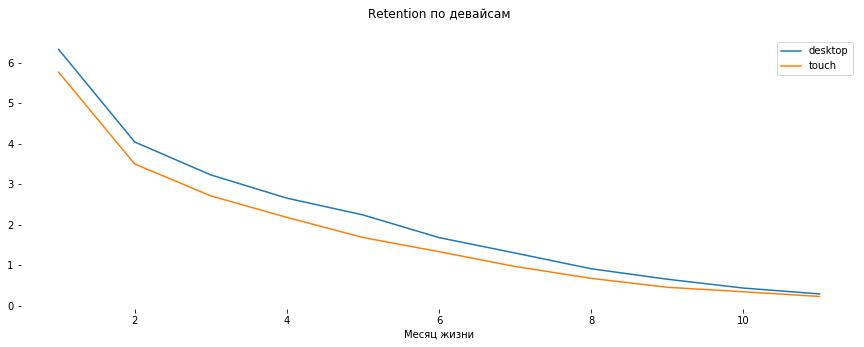

In [123]:
plt.figure(figsize=(15, 5))
plt.title('Retention по девайсам', pad=20)
sns.despine(left=True, bottom=True) # Удалить линии осей

for cohort in output_device_retention.index:
    ax = sns.lineplot(data=output_device_retention.drop(columns=0).loc[cohort], dashes=False, label=cohort)
ax.set_xlabel('Месяц жизни')
print('')

**Динамика идентична на 99%, но десктопы чуть быстрее теряют клиентов после 9-го месяца жизни**. На 12-й месяц жизни показатель десктопов и мобильных сравнивается.

<br/><br/><br/><br/><br/><br/>
Retention Rate по рекламным источникам
---

In [124]:
cohorts_source = visits.groupby(['source_id', 'lifetime_month']).agg({'uid':'nunique'}).reset_index()
cohorts_source.head()

,source_id,lifetime_month,uid
0,1,0,15227
1,1,1,1994
2,1,2,1022
3,1,3,815
4,1,4,703


In [125]:
source_cohort_size = cohorts_source[cohorts_source['lifetime_month'] == 0][['source_id', 'uid']].rename(columns={'uid':'cohort_size'})
source_cohort_size.head()

,source_id,cohort_size
0,1,15227
12,2,21362
24,3,68582
36,4,75922
48,5,52439


In [126]:
cohorts_source = cohorts_source.merge(source_cohort_size, on='source_id')
cohorts_source.head()

,source_id,lifetime_month,uid,cohort_size
0,1,0,15227,15227
1,1,1,1994,15227
2,1,2,1022,15227
3,1,3,815,15227
4,1,4,703,15227


In [127]:
cohorts_source['retention'] = ((cohorts_source['uid'] / cohorts_source['cohort_size']) * 100).round(1)
cohorts_source.head()

,source_id,lifetime_month,uid,cohort_size,retention
0,1,0,15227,15227,100.0
1,1,1,1994,15227,13.1
2,1,2,1022,15227,6.7
3,1,3,815,15227,5.4
4,1,4,703,15227,4.6


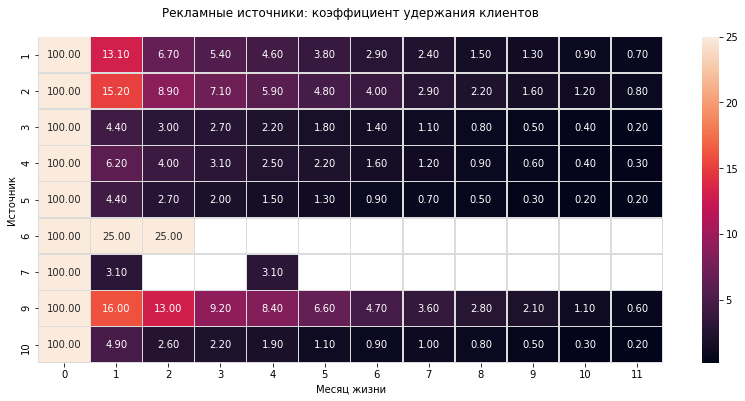

In [128]:
output_source_retention = cohorts_source.pivot_table(index='source_id', columns='lifetime_month', values='retention')

plt.figure(figsize=(14, 6))
plt.title('Рекламные источники: коэффициент удержания клиентов', pad=20)
ax = sns.heatmap(output_source_retention, annot=True, fmt='.2f', linewidths=0.5, linecolor='Gainsboro', vmax=25)
ax.set_xlabel('Месяц жизни')
ax.set_ylabel('Источник')
print('')

**Все источники я разделю на 3 условные группы: нормальные, хорошие и плохие**

1. Плохие: №6 и 7. Клиенты из этих источников уходят быстро и неравномерно.
2. Хорошие: 1, 2 и 9. Их Retention лучше всех остальных. Например, на 6-й месяц жизни он превосходит средний в 2 раза.
3. Нормальные: 3, 4, 5 и 10.

Динамика на графике:

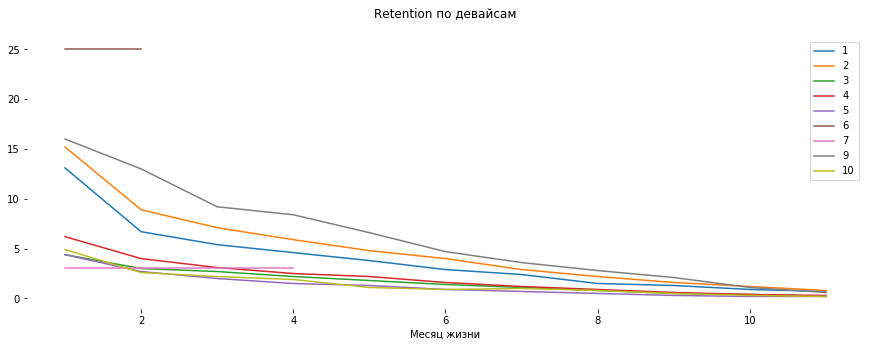

In [129]:
plt.figure(figsize=(15, 5))
plt.title('Retention по девайсам', pad=20)
sns.despine(left=True, bottom=True) # Удалить линии осей

for cohort in output_source_retention.index:
    ax = sns.lineplot(data=output_source_retention.drop(columns=0).loc[cohort], dashes=False, label=cohort)
ax.set_xlabel('Месяц жизни')
print('')

**Отлично видны все 3 группы источников,** описанные ранее: 3 хороших вверху с более высокми Retention, 4 похуже внизу и 2 аномальных (2-е прямые линии).

<br/><br/><br/><br/><br/><br/>
# Выводы

Здесь, как бывший маркетолог, я сделаю такое допущение:
1. Конечный пользователь отчета — отдел маркетинга
2. Отдел маркетинга интересуют 3 вещи: рассчитанные метрики в цифрах, выводы из них, предложения от аналитика

На этом допущении строится мой вывод: описываю метрики в цифрах, добавляю свои выводы и предложения.

Обзорные цифры
---

1. Анализируемый период: 12 месяцев, с 1 июня 2017 года по 31 мая 2018 года.
2. Среднее кол-во пользователей сервиса за период:
    * 907 в день
    * 5716 в неделю
    * 23228 в месяц
3. Среднее кол-во сессий в день: 975
4. Среднее кол-во сессий на пользователя: 1.27
5. Длительность сессии: порядка 1 минуты.
6. 72% пользователей совершают первую покупку в первое же посещение сервиса.


Пользовательские метрики
---

### Средний чек

**Цифры**

* Средний чек первой покупки: 4.1 р
* Средний чек в первый месяц: 4.26 р
* Средний чек за период: 6.75 р


**Динамика**

Средний чек за период исследования вырос на 56% во всех когортах. 


**Когорты**

* Из 12 когорт 2 аномальные: сентябрь и декабрь 2017. Их средний чек вырос за это время на 250%. Это произошло благодая скачкообразному росту на 4, 5, 6-й месяц жизни. 
* Когорта июня 2017 растет быстрее, чем остальные, за исключением аномальных.
* Динамику остальных когорт можно описать, как очень медленный рост.

Тепловая карта:

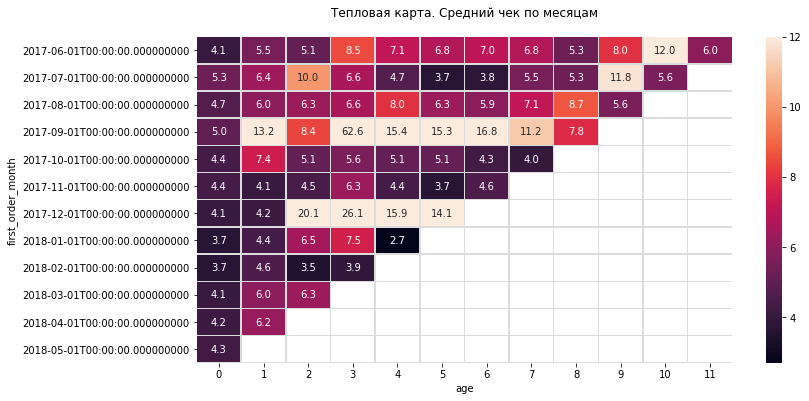

In [130]:
plt.figure(figsize=(12, 6))
plt.title('Тепловая карта. Средний чек по месяцам', pad=20)
sns.heatmap(output_aov, annot=True, fmt='.1f', linewidths=0.5, linecolor='Gainsboro', vmax=12)
print('')

**Визуализация среднего чека аномальных когорт**

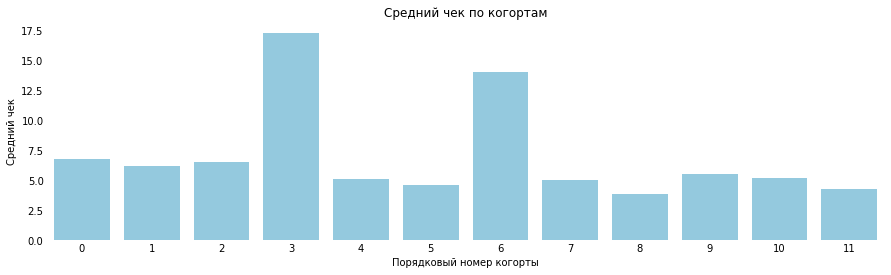

In [131]:
plt.figure(figsize=(15,4))
plt.title('Средний чек по когортам')
sns.despine(left=True, bottom=True) # Удалить линии осей


ax = sns.barplot(x=cohort_aov.index, y='aov', data=cohort_aov, color='SkyBlue', label='H')
#plt.xticks(rotation=45)
ax.tick_params(length = 0)
ax.set_xlabel('Порядковый номер когорты')
ax.set_ylabel('Средний чек')
print('')

Наглядно видно, что когорты сентября 2017 и декабря 2017 в 2 раза превосходят другие по размеру среднего чека.

### LTO: Количество покупок на пользователя

* В первый месяц среднее кол-во покупок на пользователя находится в диапазоне 1.09—1.18
* В первый месяц тенденции к увеличению или снижению кол-ва заказов не наблюдается
* Динамика накопления кол-ва заказов схожа по всем когортам (кроме первой), через пол года в среднем 1.6 на пользователя
* Выделяется когорта за июнь 2017. Начиная с 4-о месяца она незначительно опережает остальные

Тепловая карта:

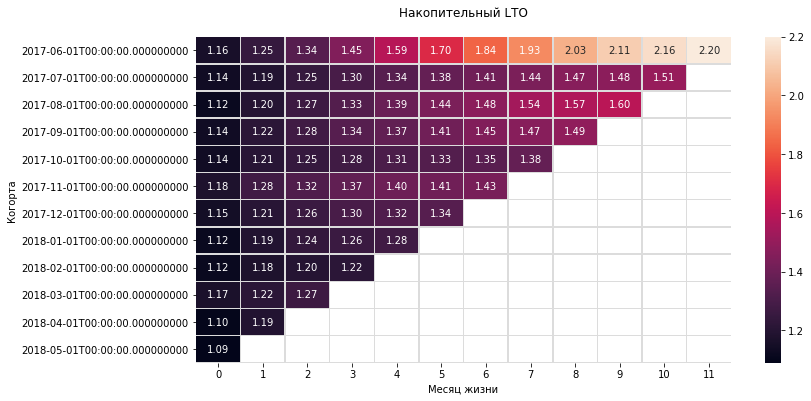

In [132]:
output_lto = report_ltv.pivot_table(index='first_order_month', columns='age', values='lto', aggfunc='mean')

plt.figure(figsize=(12, 6))
plt.title('Накопительный LTO', pad=20)
ax = sns.heatmap(output_lto.cumsum(axis=1), annot=True, fmt='.2f', linewidths=0.5, linecolor='Gainsboro')
ax.set_xlabel('Месяц жизни')
ax.set_ylabel('Когорта')
print('')

### LTV: есть когорты-лидеры

Как следствие неравномерности роста среднего чека и кол-ва покупок, описанных выше.

* LTV в когортах июня 2017 и сентября 2017 растет быстрее остальных. В первой покупают больше, во второй дороже.
* А вот декабрьская когорта, несмотря на высокий средний чек (она аномлаьная по нему), по LTV почти не выделяется. Причина в небольшом кол-ве заказов на пользователя. Покупают дорого, но немного.
* Худшие когорты по росту LTV: январь и февраль 2018.

Тепловая карта:

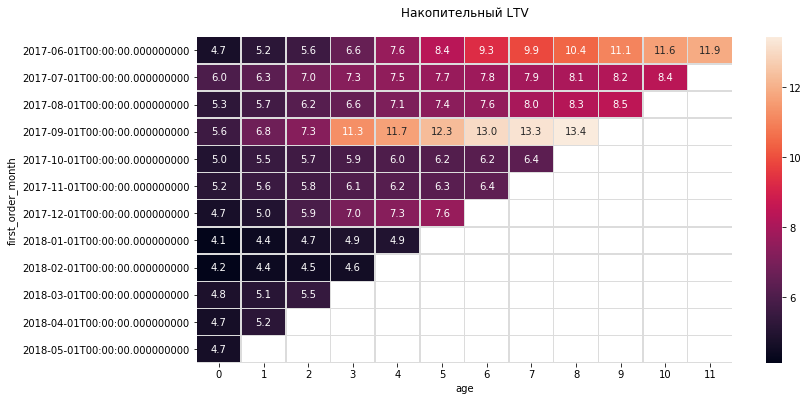

In [133]:
plt.figure(figsize=(12, 6))
plt.title('Накопительный LTV', pad=20)
sns.heatmap(output_ltv, annot=True, fmt='.1f', linewidths=0.5, linecolor='Gainsboro')
print('')

### Предложение маркетологам

**Изучите следующие когорты:**
1. Июнь 2017 года. Эти пользователи покупают на 25% чаще.
2. Сентябрь и декабрь 2017 года. В этих когортах произошел резкий скачок среднего чека на 3-4-й месяц жизни. Например, в сентябрьской когорте средний чек вырос с 8 до 62 р за месяц. Подробнее на тепловой карте ниже.

Маркетинговые метрики
---

### CAC. Цена нового клиента остается неизменной*
*за весь период исследования для всех источников

**Самый дорогой источник: №3. Самый дешевый: №9.**

In [134]:
rating_source_by_cac.rename(columns={'source_id':'Источник', 'cac':'Цена клиента'}).round({'Цена клиента': 1})

,Источник,Цена клиента
1,9,4.4
2,10,5.2
3,1,5.5
4,4,6.7
5,5,7.6
6,2,10.2
7,3,15.7


**Самая дорогая когорта: август 2017. Самая дешевая: май 2018.**

In [135]:
report_cac_2.sort_values(by='cac', ascending=True).reset_index()

,first_order_month,costs,uid,cac
0,2018-05-01,22224.27,2988,7.437841
1,2017-10-01,36322.88,4340,8.369327
2,2018-03-01,30415.27,3533,8.608907
3,2017-12-01,38315.35,4383,8.741809
4,2017-06-01,18015.00,2023,8.905091
5,2018-02-01,32723.03,3651,8.962758
6,2017-11-01,37907.88,4081,9.288870
7,2017-09-01,24368.91,2581,9.441654
8,2017-07-01,18240.59,1923,9.485486
9,2018-04-01,22289.38,2276,9.793225


**Стоимость клиента зависит от сезона**

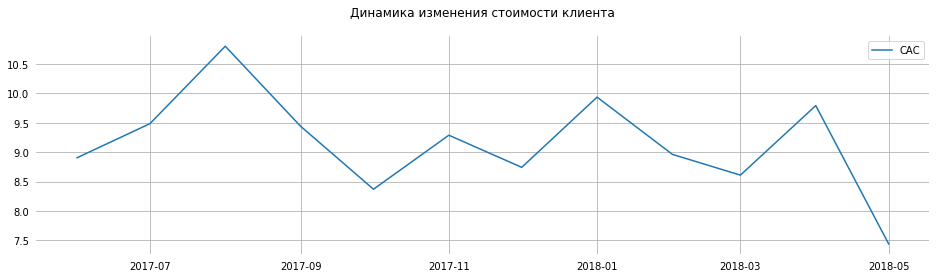

In [136]:
plt.figure(figsize=(16, 4))
plt.title('Динамика изменения стоимости клиента', pad=20)
sns.despine(left=True, bottom=True) # Удалить линии осей

ax = sns.lineplot(data=report_cac_2['cac'] , dashes=False, label='CAC')
ax.tick_params(labelleft=True, left=False, bottom=False)
plt.grid(True)
print('')

График визуализирует сезонное колебании стоимости клиента **без явной тенденции к снижению или повышению.** Динамика по источник повторяет данный график.

**CAC по когортам и источникам: есть очень дорогие месяца**

* Для каждой когорты характерно распределение стоимости клиента от меньшего к большему, что логично, одни источники дороже, другие дешевле
* Источник №3 не только лидер по инвестициям, но у него же самая высокая стоимость привлечения нового клиента: 15,69р против 9р в среднем.
* Наблюдаются аномалия, 9-й источник для апрельской когорты, его CAC равен 9.58, что в 1.5-3 раза превышает стоимость клиента в другие месяцы. Для других источников также характерно снижение-повышение стоимости клиента, но более плавное от месяца к месяцы. В апрельской когорте стоимость клиента поднимается резко и значительно.

Тепловая карта:

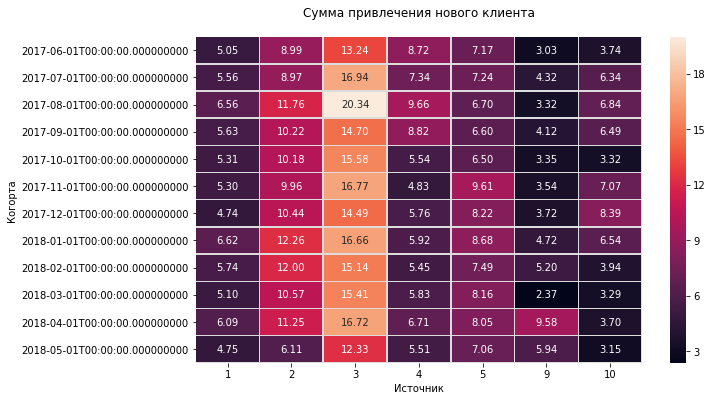

In [137]:
plt.figure(figsize=(10, 6))
plt.title('Сумма привлечения нового клиента', pad=20)
ax = sns.heatmap(output_cac, annot=True, fmt='.2f', linewidths=0.5, linecolor='Gainsboro', vmax=20)
ax.set_xlabel('Источник')
ax.set_ylabel('Когорта')
print('')

### Предложение маркетологам. 

**Рассмотрите возможность отказаться от 3-го источника.**

Даже минимальная стоимость клиента в 12.33р превышает накопленный LTV за 1 год для первой когорты, которая явлется лучшей из всех(кроме аномальной сентябрьской). Остальные когорты растут на 20-30% медленне. А это значит, что клиент из этого источника будет окупаться, как минимум за 1.5 года.

Если же исходить из средней стоимости клиента в 15.7р (среднее для 3-го источника), то окупается оказывается много больше 1.5 лет. Если вообще окупится, т.к. через год продолжают покупать всего 5% пользователей.

### ROI. Коэффициент возврата инвестиций

* По скорости роста ROI выделяются 3 когорты: июнь, сентябрь, декабрь. Первая растет быстрее остальных, вторая и третья аномальные по среднему чеку.
* Окупились 2 когорты: за июнь (на 6-й меся жизни) и сентябрь (на 3-й).
* В ближайшие 2 месяца окупятся (вероятно) еще 2 когорты: упомянутая выше декабрьская, а также июлская когорты.

Тепловая карта:

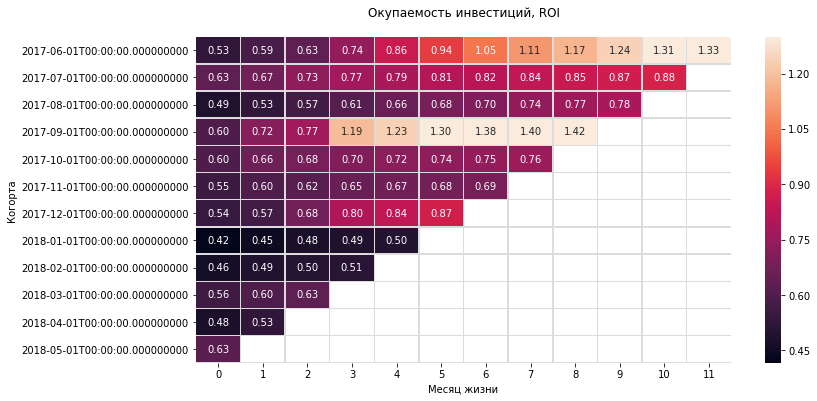

In [138]:
plt.figure(figsize=(12, 6))
plt.title('Окупаемость инвестиций, ROI', pad=20)
ax = sns.heatmap(output_roi, annot=True, fmt='.2f', linewidths=0.5, linecolor='Gainsboro', vmax=1.3)
ax.set_xlabel('Месяц жизни')
ax.set_ylabel('Когорта')
print('')

**Абсолютные цифры**
* За 12 мес в рекламу вложено 239131 р, доход составил 252053 р.
* Текущее состояние проекта: убыток в 77077 р.

Retention Rate
---

### Retention: имеет тенденцию к снижению с каждой новой когортой

Визуализирую этот смысл на графике:

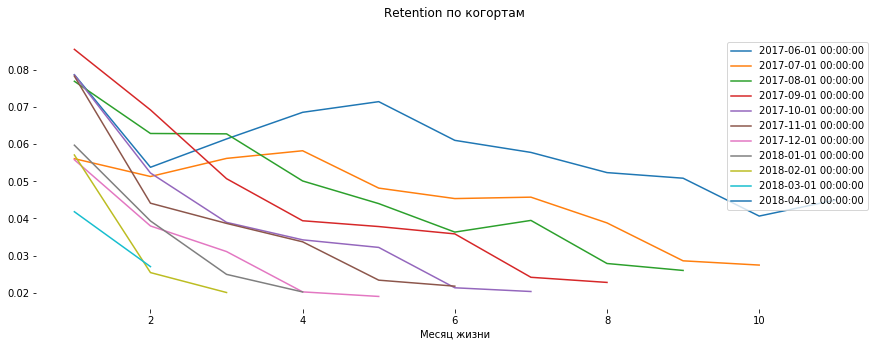

In [139]:
plt.figure(figsize=(15, 5))
plt.title('Retention по когортам', pad=20)
sns.despine(left=True, bottom=True) # Удалить линии осей

for cohort in retention_month.index:
    ax = sns.lineplot(data=retention_month.drop(columns=0).loc[cohort], dashes=False, label=cohort)
ax.set_xlabel('Месяц жизни')
print('')

**Чем старше когорта, тем ниже ее Retention.**

**С возрастом в каждой когорте Retention снижается,** плавно и линейно, что соответсвует природе этйо цифры. Аномалий не обнаружено.

Все значения Retention представлены ниже:

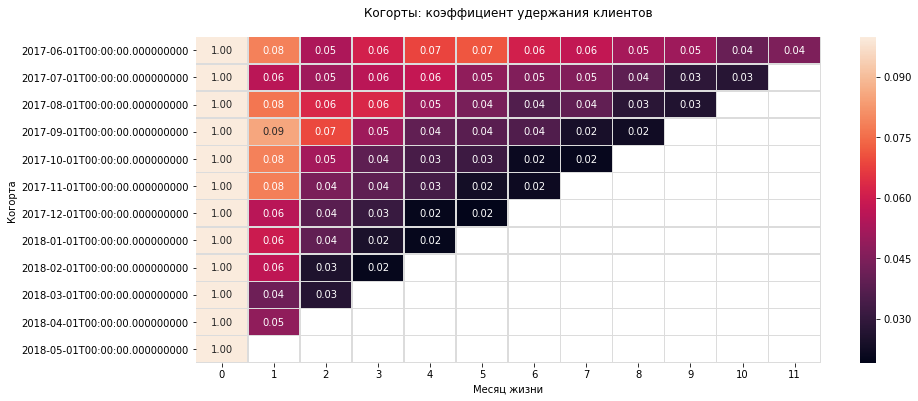

In [140]:
plt.figure(figsize=(14, 6))
plt.title('Когорты: коэффициент удержания клиентов', pad=20)
ax = sns.heatmap(retention_month, annot=True, fmt='.2f', linewidths=0.5, linecolor='Gainsboro', vmax=0.1)
ax.set_xlabel('Месяц жизни')
ax.set_ylabel('Когорта')
print('')

### Retention по устройствам: десктопы чуть чуть лучше

**Цифры:**

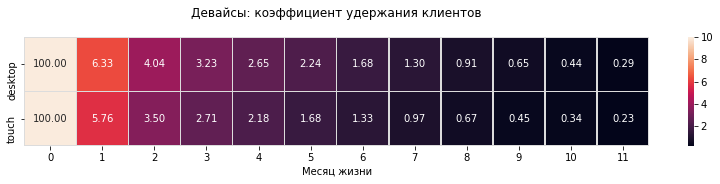

In [141]:
output_device_retention = cohorts_device.pivot_table(index='device', columns='lifetime_month', values='retention')

plt.figure(figsize=(14, 2))
plt.title('Девайсы: коэффициент удержания клиентов', pad=20)
ax = sns.heatmap(output_device_retention, annot=True, fmt='.2f', linewidths=0.5, linecolor='Gainsboro', vmax=10)
ax.set_xlabel('Месяц жизни')
ax.set_ylabel('')
print('')

**Динамика: идентична на 99%.** Но десктопы чуть быстрее теряют клиентов после 9-го месяца жизни. На 12-й месяц жизни показатель десктопов и мобильных сравнивается:

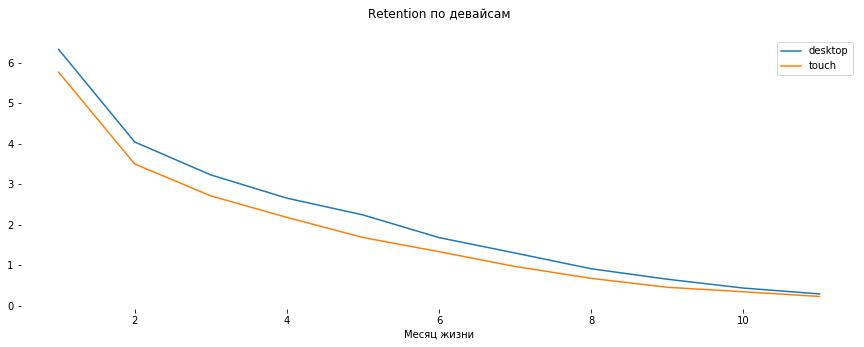

In [142]:
plt.figure(figsize=(15, 5))
plt.title('Retention по девайсам', pad=20)
sns.despine(left=True, bottom=True) # Удалить линии осей

for cohort in output_device_retention.index:
    ax = sns.lineplot(data=output_device_retention.drop(columns=0).loc[cohort], dashes=False, label=cohort)
ax.set_xlabel('Месяц жизни')
print('')

### Retention Rate по рекламным источникам: есть хорошие, нормальные и аномальные

* Аномальные: №6 и 7. Клиенты из этих источников уходят быстро и неравномерно.
* Хорошие: 1, 2 и 9. Их Retention лучше остальных. Например, на 6-й месяц жизни он превосходит средний в 2 раза.
* Нормальные: 3, 4, 5 и 10.

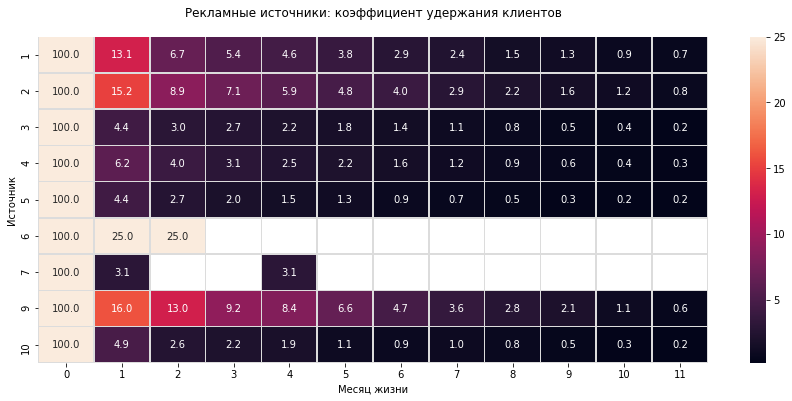

In [143]:
output_source_retention = cohorts_source.pivot_table(index='source_id', columns='lifetime_month', values='retention')

plt.figure(figsize=(15, 6))
plt.title('Рекламные источники: коэффициент удержания клиентов', pad=20)
ax = sns.heatmap(output_source_retention, annot=True, fmt='.2f', linewidths=0.5, linecolor='Gainsboro', vmax=25)
ax.set_xlabel('Месяц жизни')
ax.set_ylabel('Источник')
print('')

**На графике ниже эти группы видно еще нагляднее:** 3 хороших вверху с более высокми Retention, 4 похуже внизу и 2 аномальных (2-е прямые линии).

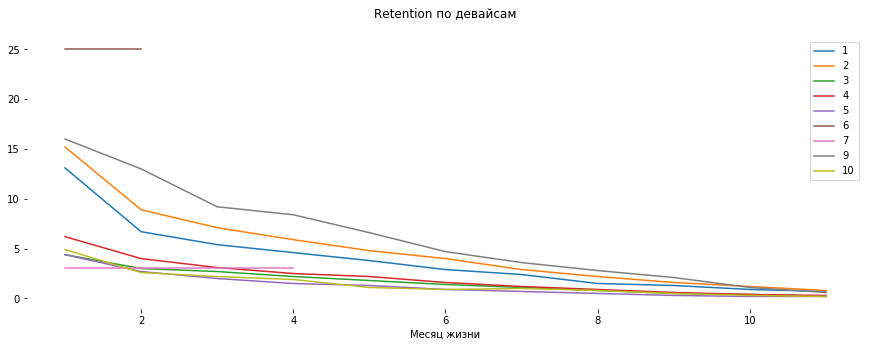

In [144]:
plt.figure(figsize=(15, 5))
plt.title('Retention по девайсам', pad=20)
sns.despine(left=True, bottom=True) # Удалить линии осей

for cohort in output_source_retention.index:
    ax = sns.lineplot(data=output_source_retention.drop(columns=0).loc[cohort], dashes=False, label=cohort)
ax.set_xlabel('Месяц жизни')
print('')

### Предложение маркетологам

**Возможно, имеет место техническая проблема в 6 и 7 исчтониках.** Потому что характер изменения Retention Rate для этих источников противоречит их природе. Он прерывистый и обрывается на 3-5-й месяц жизни. Что наглядно видно на тепловой карте.

**Рассмотрите возможность масштабировать трафик из источников 1, 2 и 9.*** Retention Rate 1,2 и 9 источников намного выше остальных.

# Предложения для отдела маркетинга

**Точка роста. Изучите пользователей из 3 когорт:**
* Июнь 2017 года. Пользователи этой когорты покупают на 25% чаще.
* Сентябрь и декабрь 2017 года. В этих когортах произошел резкий скачок среднего чека на 3-4-й месяц жизни. В сентябрьской когорте он вырос с 8 до 62 р за месяц.

**Рассмотрите возможность отказаться от 3-го источника, клиенты из него обходятся намного дороже других.**

Даже минимальная стоимость клиента в 12.33р превышает накопленный LTV за 1 год для первой когорты, которая явлется лучшей из всех(кроме аномальной сентябрьской). Остальные когорты растут на 20-30% медленне. А это значит, что клиент из этого источника будет окупаться, как минимум за 1.5 года.

Если же исходить из средней стоимости клиента в 15.7р (среднее для 3-го источника), то окупается оказывается много больше 1.5 лет. Если вообще окупится, т.к. через год продолжают покупать всего 5% пользователей.

**Возможно, имеет место техническая проблема в 6 и 7 исчтониках.** Потому что характер изменения Retention Rate для этих источников противоречит их природе. Он прерывистый и обрывается на 3-5-й месяц жизни. Что наглядно видно на тепловой карте.

**Рассмотрите возможность масштабировать трафик из источников 1, 2 и 9.** Их Retention Rate намного выше остальных.